<a href="https://colab.research.google.com/github/sthadhlani/superbowl_ads/blob/master/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update -qq 2>&1 > /dev/null 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools > /dev/null
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1  > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse 2>&1 > /dev/null
!pip install -U statsmodels  2>&1 > /dev/null
!pip install WordCloud 2>&1 > /dev/null

gpg: keybox '/tmp/tmplkl6u9lc/pubring.gpg' created
gpg: /tmp/tmplkl6u9lc/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


Accessing Google Drive from your collabratory
https://colab.research.google.com/notebook#fileId=1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q&scrollTo=c99EvWo1s9-x


In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

Looks like they made some changes... You don't have to enter the code again and again

In [2]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
# Work around misordering of STREAM and STDIN in Jupyter.
# https://github.com/jupyter/notebook/issues/3159
prompt = !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
if(prompt):
  vcode = getpass.getpass(prompt[0] + '\n\nEnter verification code: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force

Enter verification code: ··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [3]:
!mkdir -p drive
!google-drive-ocamlfuse drive

print('Files in Drive:')

!ls drive | grep Colab

Files in Drive:
Colab Notebook


In [12]:
!ls "drive/Colab Notebook/ECE219_tweet_data"
TRAINPATH = "drive/Colab Notebook/ECE219_tweet_data/"
testpath = "drive/Colab Notebook/ECE219_tweet_test/"

aggregated.p		    sb49.p		      sentimentlikeAGirl.p
gohawks.p		    sentimentbudlight_1.p     sentimentsnickers_1.p
gopatriots.p		    sentimentbudlight.p       sentimentsnickers.p
gs_forest_q7.p		    sentimentdoritos_1.p      #superbowl.csv
gs_gradient_after.p	    sentimentdoritos.p	      #superbowl_data.csv.
gs_gradient_aggregated.p    sentimentecuador_1.p      superbowl.p
gs_gradient_before.p	    sentimentecuador.p	      tweets_#gohawks.txt
gs_gradient_during.p	    sentimentesurance_1.p     tweets_#gopatriots.txt
gs_gradient_q9.p	    sentimentesurance.p       tweets_#nfl.txt
gs_neural_net_aggregated.p  sentimenthalftime_1.p     tweets_#patriots.txt
gs_neural_net_q13.p	    sentimenthalftime.p       tweets_#sb49.txt
nfl.p			    sentimentidinamenzel_1.p  tweets_#superbowl.txt
patriots.p		    sentimentidinamenzel.p
rf_aggregated.p		    sentimentlikeAGirl_1.p


## Pre-loading

# Only run if you are updating columns

In [0]:
import json
import pandas as pd
import numpy as np
import datetime
import pytz
import pickle
#PRE-PROCESS

def preload(filename):
  # NOTE: make sure the order of this and filtered row is THE SAME
  col_names = ["unix_timestamp", "pst_timestamp", "text", "loc", "retweet_count", "user_follower_count",'RankingScore','Mention']
  data = []
  with open(filename) as f:
      for line in f:
          row = json.loads(line)
          filtered_row = [row['citation_date'],
                          datetime.datetime.fromtimestamp(row['citation_date'], pytz.timezone('America/Los_Angeles')),
                          row["tweet"]["text"],
                          row['tweet']['user']['location'],
                          row['metrics']['citations']['total'],
                          row['author']['followers'],
                          row['metrics']['ranking_score'],
                          len(row['tweet']['entities']['user_mentions'])]
          data.append(filtered_row)
  return pd.DataFrame(data, columns=col_names)

superbowl = preload("{}tweets_#superbowl.txt".format(TRAINPATH))
pickle.dump(superbowl, open( "{}superbowl.p".format(TRAINPATH), "wb" ))

nfl = preload("{}tweets_#nfl.txt".format(TRAINPATH))
pickle.dump(nfl, open( "nfl.p".format(TRAINPATH), "wb" ))

gohawks = preload("{}tweets_#gohawks.txt".format(TRAINPATH))
pickle.dump(nfl, open( "gohawks.p".format(TRAINPATH), "wb" ))

sb49 = preload("{}tweets_#sb49.txt".format(TRAINPATH))
pickle.dump(sb49, open( "{}sb49.p".format(TRAINPATH), "wb" ))

gopatriots = preload("{}tweets_#gopatriots.txt".format(TRAINPATH))
pickle.dump(gopatriots, open( "gopatriots.p".format(TRAINPATH), "wb" ))

patriots = preload("{}tweets_#patriots.txt".format(TRAINPATH))
pickle.dump(patriots, open( "{}patriots.p".format(TRAINPATH), "wb" ))

AGGREGATED = pd.concat([superbowl, nfl, gohawks, gopatriots, patriots, sb49])
pickle.dump(AGGREGATED, open( "{}aggregated.p".format(TRAINPATH), "wb"))

ALL_DATA = {
    "#superbowl": superbowl,
    "#nfl": nfl,
    "#gohawks": gohawks,
    "#gopatriots": gopatriots,
    "#patriots": patriots,
    "#sb49": sb49
}

## Use this to load existing pickled data if not updating above

In [0]:

import json
import pandas as pd
import datetime
import datetime
import pytz
import pickle
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel
from matplotlib.font_manager import FontProperties


superbowl = pickle.load(open("{}superbowl.p".format(TRAINPATH), "rb" ))
nfl = pickle.load(open("{}nfl.p".format(TRAINPATH), "rb" ))
gohawks = pickle.load(open("{}gohawks.p".format(TRAINPATH), "rb" ))
sb49 = pickle.load(open("{}sb49.p".format(TRAINPATH), "rb" ))
patriots = pickle.load(open("{}patriots.p".format(TRAINPATH), "rb" ))
gopatriots = pickle.load(open("{}gopatriots.p".format(TRAINPATH), "rb" ))

ALL_DATA = {
    "#superbowl": superbowl,
    "#nfl": nfl,
    "#gohawks": gohawks,
    "#gopatriots": gopatriots,
    "#patriots": patriots,
    "#sb49": sb49
}


AGGREGATED = pickle.load(open("{}aggregated.p".format(TRAINPATH),"rb"))

###QUESTION 1

In [7]:
for filename, d in ALL_DATA.items():
    print("""{}:
               AverageFollowers: {}, 
               AverageRetweets : {},
               TotalTweets:{}""".format(filename, np.average(d.user_follower_count),
                                              np.average(d.retweet_count),
                                              len(d)))

#superbowl:
               AverageFollowers: 8814.96799424623, 
               AverageRetweets : 2.3911895819207736,
               TotalTweets:1213813
#nfl:
               AverageFollowers: 4662.37544523693, 
               AverageRetweets : 1.5344602655543254,
               TotalTweets:233022
#gohawks:
               AverageFollowers: 4662.37544523693, 
               AverageRetweets : 1.5344602655543254,
               TotalTweets:233022
#gopatriots:
               AverageFollowers: 1427.2526051635405, 
               AverageRetweets : 1.4081919101697078,
               TotalTweets:23511
#patriots:
               AverageFollowers: 3280.4635616550277, 
               AverageRetweets : 1.7852871288476946,
               TotalTweets:440621
#sb49:
               AverageFollowers: 10374.160292019487, 
               AverageRetweets : 2.52713444111402,
               TotalTweets:743649


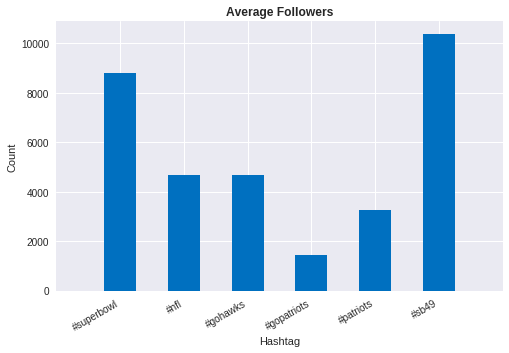

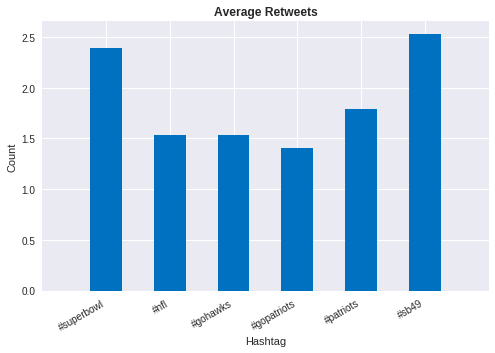

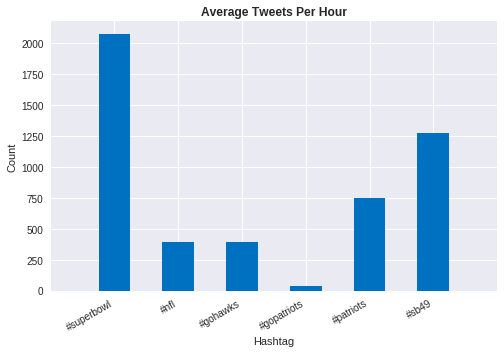

{'#superbowl': 2072.11840170408, '#nfl': 397.0213901819841, '#gohawks': 397.0213901819841, '#gopatriots': 40.95469800606194, '#patriots': 750.89426460689, '#sb49': 1276.8570598680474}


In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel
from matplotlib.font_manager import FontProperties

def draw_graph(x_labels,xtick_vals,title):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.xlim(xmin=-1 , xmax= len(ALL_DATA.keys()) )
    yoff = ([0.0]*len(ALL_DATA.keys()))
    ind = range(len(ALL_DATA.keys()))
    ax.bar(ind, xtick_vals, align='center', width=0.5, bottom=yoff, color='#0070C0', linewidth=0 )
    yoff += xtick_vals
    ax.set_xticks (ind)
    ax.set_xticklabels(x_labels)
    ax.set_title(title, weight = 'bold')
    ax.yaxis.grid(True)
    fig.autofmt_xdate()
    plt.xlabel("Hashtag")
    plt.ylabel("Count")
    plt.show()

def average_tweets_per_hr(data):
    return data.shape[0]/((np.max(data['unix_timestamp'])-np.min(data['unix_timestamp']))/3600)

avg = {k:np.mean(v['user_follower_count']) for k,v in ALL_DATA.items()}
x_labels =  avg.keys()
xtick_vals = avg.values()
draw_graph(x_labels,xtick_vals,"Average Followers")

avg = {k:np.mean(v['retweet_count']) for k,v in ALL_DATA.items()}
x_labels =  avg.keys()
xtick_vals = avg.values()
draw_graph(x_labels,xtick_vals,"Average Retweets")

avg = {k:average_tweets_per_hr(v) for k,v in ALL_DATA.items()}
x_labels =  avg.keys()
xtick_vals = avg.values()
draw_graph(x_labels,xtick_vals,"Average Tweets Per Hour")
print(avg)

###QUESTION 2
Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a histogram with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet [#hashtag].txt.

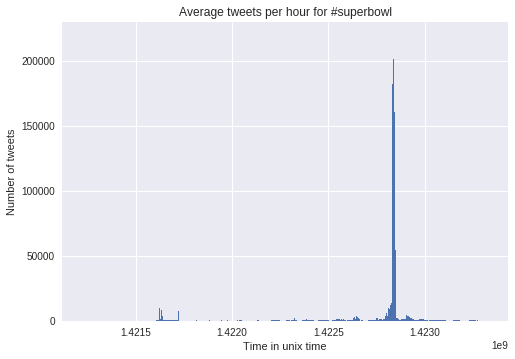

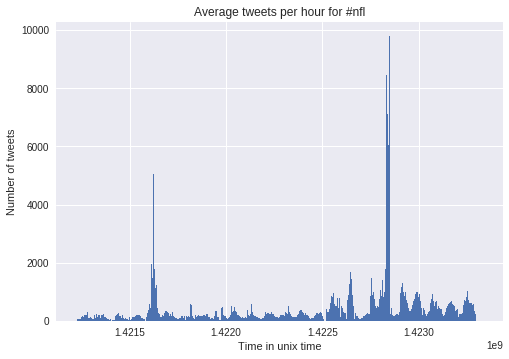

In [10]:
import json
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel
from matplotlib.font_manager import FontProperties

for hashtag in ['#superbowl','#nfl']:
    d = ALL_DATA[hashtag]
    bins = range(np.min(d.unix_timestamp),np.max(d.unix_timestamp),3600)

    plt.hist(d.unix_timestamp, bins)
    plt.xlabel('Time in unix time')
    plt.ylabel('Number of tweets')
    plt.title('Average tweets per hour for {}'.format(hashtag))

    plt.show()

## Linear Regression
Create time windows from the data to extract features. Here, use 1-hour time window and
calculate the features in each time window, resulting in <# of hours> data points.
For each hashtag data le, t a linear regression model using the following 5 features to predict
number of tweets in the next hour, with features extracted from tweet data in the previous
hour.
The features you should use are:
 Number of tweets
 Total number of retweets
 Sum of the number of followers of the users posting the hashtag
 Maximum number of followers of the users posting the hashtag
2
 Time of the day (which could take 24 values that represent hours of the day with respect
to a given time zone)
For each hashtag, you should train a separate model.

###QUESTION 3
For each of your models, report your model’s Mean Squared Error (MSE) and R-squared measure. Also, analyse the significance of each feature using the t-test and p-value. You may use the OLS in the libarary statsmodels in Python.

In [0]:
def extract_features(data):
    featuresX = list()
    featuresY = []
    for time in range(min(data['unix_timestamp']),max(data['unix_timestamp']),3600):
        limited = data.loc[(data['unix_timestamp']>=time) & (data['unix_timestamp']<=time+3600)]
        timeOfDay = datetime.datetime.fromtimestamp(time, pytz.timezone('America/Los_Angeles')).hour
        if (limited.shape[0] > 0):
            featuresX.append({
                'totalTweets':limited.shape[0],
                'totalRetweets': sum(limited['retweet_count']),
                'maxFollowers': max(limited['user_follower_count']),
                'totalFollowers': sum(limited['user_follower_count']),
                'timeOfDay': timeOfDay
            })
            featuresY.append(limited.shape[0])
        else: #no data
            featuresX.append({
                'totalTweets':0,
                'totalRetweets':0,
                'maxFollowers':0,
                'totalFollowers':0,
                'timeOfDay': timeOfDay
            })
            featuresY.append(limited.shape[0])
    X = pd.DataFrame(featuresX[:-1])
    Y = np.roll(np.array(featuresY),-1)[:-1]
    return X, Y

In [76]:
import statsmodels.api as sm

import json
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

features = dict()
for hashtag,d in ALL_DATA.items():
    X, y = extract_features(d)
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    print('{} Summary for OLS Model, MSE = {}'.format(hashtag,results.mse_model))
    print(results.summary())

#superbowl Summary for OLS Model, MSE = 26289228288.217094
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     762.3
Date:                Sat, 09 Jun 2018   Prob (F-statistic):          5.83e-252
Time:                        23:44:28   Log-Likelihood:                -5903.7
No. Observations:                 585   AIC:                         1.182e+04
Df Residuals:                     579   BIC:                         1.185e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

## Feature Analysis

###QUESTION 4
Design a regression model using any features from the papers you find or other new features you may find useful for this problem. Fit your model on the data of each hashtag and report fitting MSE and significance of features.

In [0]:
def extract_additional_features(data,window=3600):
  featuresX = list()
  featuresY = []
  firstTimeStamp = min(data['unix_timestamp'])
  firstTimeStamp = (firstTimeStamp - firstTimeStamp%3600)
  lastTimeStamp = max(data['unix_timestamp'])
  # split into window-long timestamps
  for time in range(firstTimeStamp,lastTimeStamp, window):
    limited = data.loc[(data['unix_timestamp']>=time) & (data['unix_timestamp']<=time+window)]
    timeOfDay = datetime.datetime.fromtimestamp(time, pytz.timezone('America/Los_Angeles')).hour
    if(limited.shape[0]>0):
      featuresX.append({
        'totalTweets':limited.shape[0],
        'totalRetweets':sum(limited['retweet_count']),
        'totalRankingScore':sum(limited['RankingScore']),
        'averageRankingScore':np.mean(limited['RankingScore']),
        'totalMentions':sum(limited['Mention']),
        'maxFollowers': max(limited['user_follower_count']),
        'totalFollowers': sum(limited['user_follower_count']),
        'timeOfDay':timeOfDay
      })
      featuresY.append(limited.shape[0])
    else:
      featuresX.append({
        'totalTweets':0,
        'totalRetweets':0,
        'totalRankingScore':0,
        'averageRankingScore':0,
        'totalMentions':0,
        'maxFollowers':0,
        'totalFollowers':0,
        'timeOfDay':timeOfDay
      })
      featuresY.append(limited.shape[0])
    
  X = pd.DataFrame(featuresX[:-1])
  Y = np.roll(np.array(featuresY),-1)[:-1]
  return X, Y

In [14]:
for hashtag,d in ALL_DATA.items():
    FeaturesX, y = extract_additional_features(d)
    X = sm.add_constant(FeaturesX)
    model = sm.OLS(y, X)
    results = model.fit()
    print('{} Summary for OLS Model, MSE = {}'.format(hashtag,results.mse_model))
    print(results.summary())

#superbowl Summary for OLS Model, MSE = 16766210666.215034
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     492.7
Date:                Sun, 10 Jun 2018   Prob (F-statistic):          3.72e-252
Time:                        04:48:35   Log-Likelihood:                -5908.4
No. Observations:                 586   AIC:                         1.183e+04
Df Residuals:                     577   BIC:                         1.187e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

###QUESTION 5
For each of the top 3 features (i.e. with the smallest p-values) in your measurements, draw a scatter plot of predictant (number of tweets for next hour) versus value of that feature, using all the samples you have extracted, and analyze it.
Do the regression coefficients agree with the trends in the plots? If not, why?

In [0]:

for hashtag,d in ALL_DATA.items():
    X, y = extract_additional_features(d)    
    plt.title('Scatter plot for {}'.format(hashtag))
    plt.scatter(X['totalRetweets'], y, color='green', marker='.', label='Total Retweets')
    plt.scatter(X['totalRankingScore'], y, color='red', marker='.', label='Total Ranking Score')
    plt.scatter(X['totalMentions'], y, color='blue', marker='.', label='Total Mentions')
    plt.xlabel('Feature Value')
    plt.ylabel('Predictant (number of tweets in next hour)')
    plt.legend()
    plt.show()

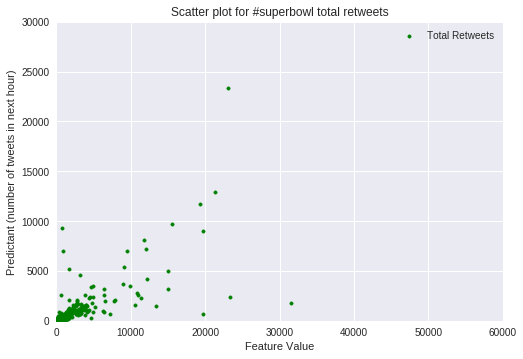

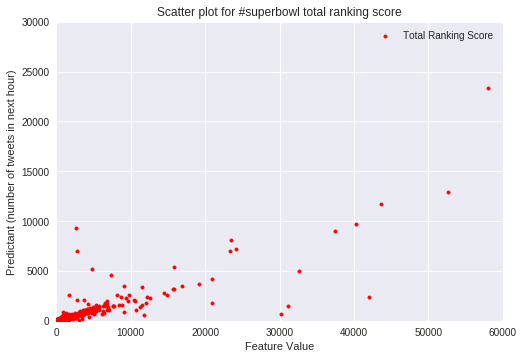

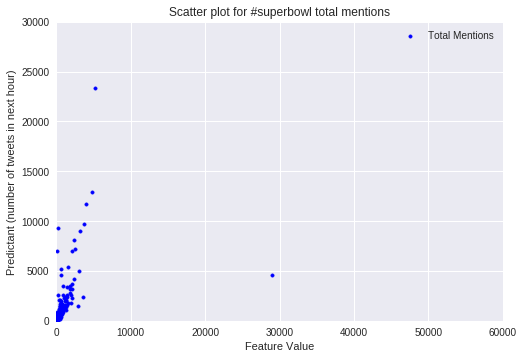

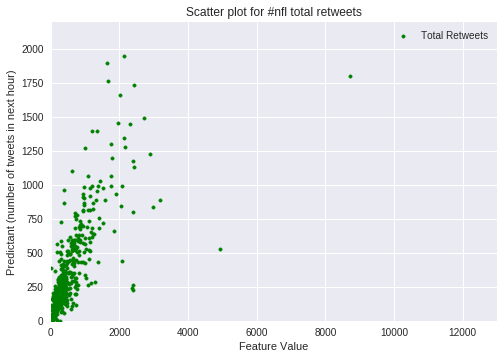

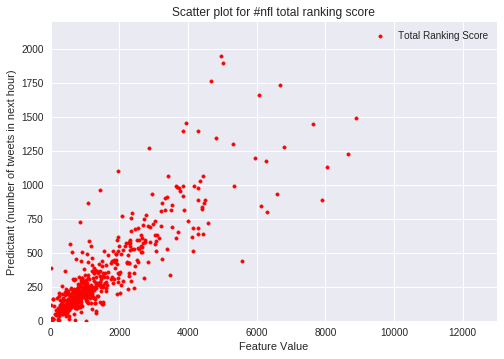

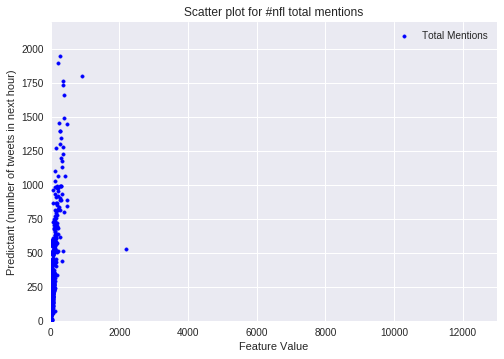

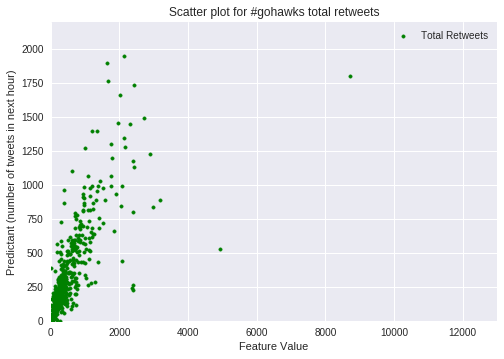

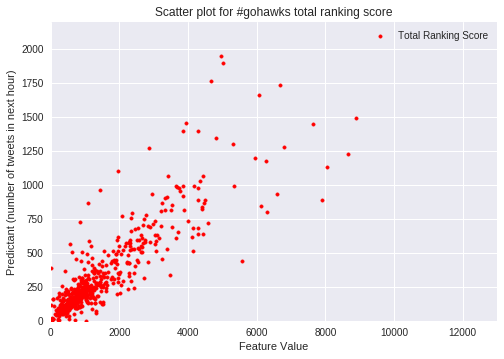

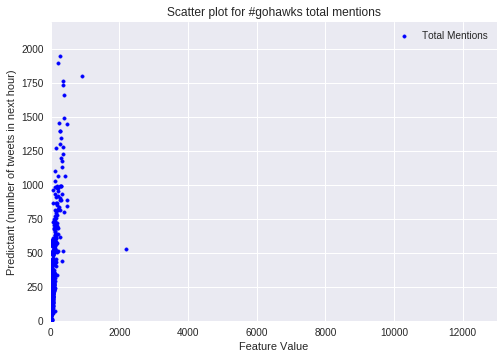

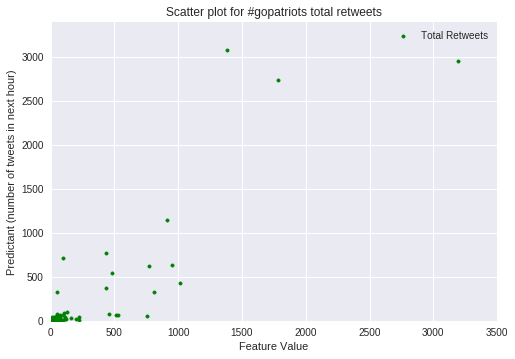

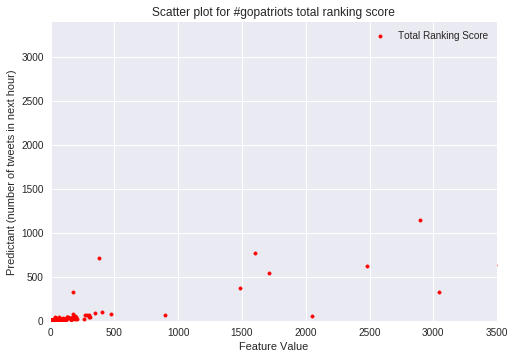

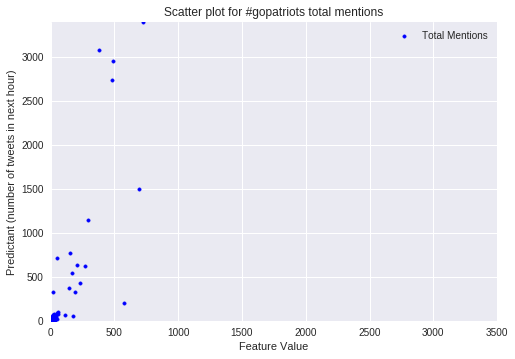

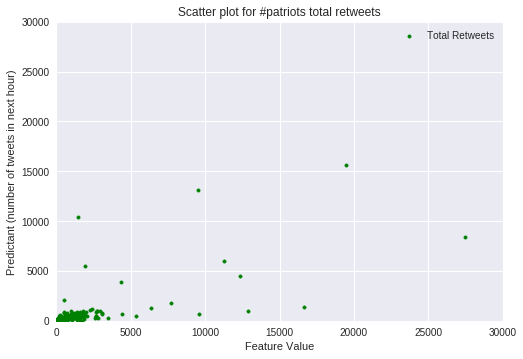

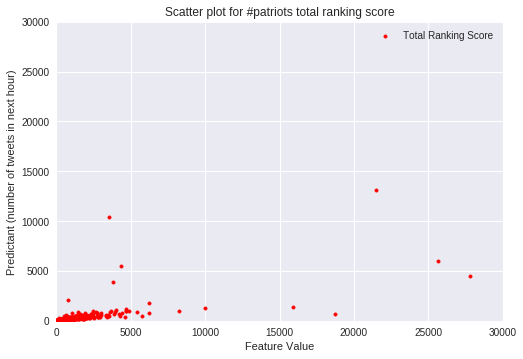

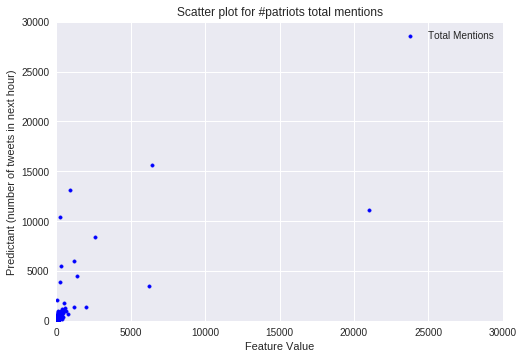

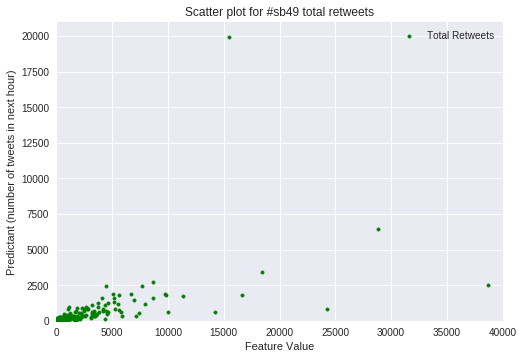

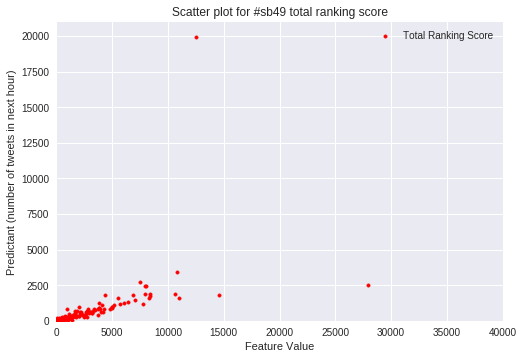

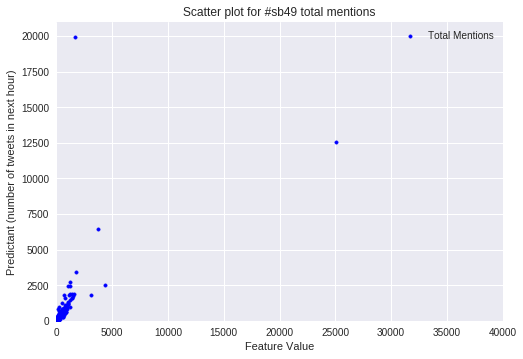

In [15]:
bounds = {
    "#superbowl": [60000,30000],
    "#nfl": [13000, 2200],
    "#gohawks": [13000, 2200],
    "#gopatriots": [3500,3400],
    "#patriots": [30000,30000],
    "#sb49": [40000,21000] 
}
for hashtag,d in ALL_DATA.items():
    X, y = extract_additional_features(d)
    plt.title('Scatter plot for {} total retweets'.format(hashtag))
    plt.scatter(X['totalRetweets'], y, color='green', marker='.', label='Total Retweets')
    plt.xlabel('Feature Value')
    plt.ylabel('Predictant (number of tweets in next hour)')
    plt.xlim(0,bounds[hashtag][0])
    plt.ylim(0,bounds[hashtag][1])
    plt.legend()
    plt.show()
    
    plt.title('Scatter plot for {} total ranking score'.format(hashtag))
    plt.scatter(X['totalRankingScore'], y, color='red', marker='.', label='Total Ranking Score')
    plt.xlabel('Feature Value')
    plt.ylabel('Predictant (number of tweets in next hour)')
    plt.xlim(0,bounds[hashtag][0])
    plt.ylim(0,bounds[hashtag][1])
    plt.legend()
    plt.show()
    
    plt.title('Scatter plot for {} total mentions'.format(hashtag))
    plt.scatter(X['totalMentions'], y, color='blue', marker='.', label='Total Mentions')
    plt.xlabel('Feature Value')
    plt.ylabel('Predictant (number of tweets in next hour)')
    plt.xlim(0,bounds[hashtag][0])
    plt.ylim(0,bounds[hashtag][1])
    plt.legend()
    plt.show()

## Piece-wise Linear Regression

###QUESTION 6
We define three time periods and their corresponding window length as follows:
1. Before Feb. 1, 8:00 a.m.: 1-hour window
2. Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window 3. After Feb. 1, 8:00 p.m.: 1-hour window
For each hashtag, train 3 regression models, one for each of these time periods (the times are all in PST). Report the MSE and R-squared score for each case.

In [184]:
SUPERBOWL_START_TIME = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
SUPERBOWL_END_TIME = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pytz.timezone('America/Los_Angeles'))


def train_regression(hashtag, data, window):
    FeaturesX, y = extract_additional_features(data,window)
    X = sm.add_constant(FeaturesX)
    model = sm.OLS(y, X)
    result = model.fit()
    print('     MSE: {}'.format(result.mse_model))
    print('     R-Squared: {}'.format(result.rsquared))
    return result
  
def do_piecewise_regression(hashtag, d):
    pre_bowl_data = d[d.pst_timestamp < SUPERBOWL_START_TIME]
    print('{} with window = 1 hr. Before superbowl'.format(hashtag))
    train_regression(hashtag, pre_bowl_data, 60*60)

    bowl_data = d[(d.pst_timestamp < SUPERBOWL_END_TIME) & (d.pst_timestamp > SUPERBOWL_START_TIME)]
    print('{} with window = 5 min. During superbowl'.format(hashtag))
    train_regression(hashtag, bowl_data, 5*60)

    
    post_bowl_data = d[d.pst_timestamp > SUPERBOWL_END_TIME]
    print('{} with window = 1 hr. After superbowl'.format(hashtag))
    train_regression(hashtag, post_bowl_data, 60*60)
    
for hashtag, d in ALL_DATA.items():
    print()
    print('{} Summary '.format(hashtag))
    do_piecewise_regression(hashtag, d)




#superbowl Summary 
#superbowl with window = 1 hr. Before superbowl
     MSE: 19995198.269422498
     R-Squared: 0.43579474969881193
#superbowl with window = 5 min. During superbowl
     MSE: 1077396633.3741574
     R-Squared: 0.9159139852608673
#superbowl with window = 1 hr. After superbowl
     MSE: 10615718.335548282
     R-Squared: 0.768632172790542

#nfl Summary 
#nfl with window = 1 hr. Before superbowl
     MSE: 3876083.0397961517
     R-Squared: 0.5264150018152978
#nfl with window = 5 min. During superbowl
     MSE: 1870271.3660496844
     R-Squared: 0.8497210345757967
#nfl with window = 1 hr. After superbowl
     MSE: 1148556.5293682404
     R-Squared: 0.7991957334777623

#gohawks Summary 
#gohawks with window = 1 hr. Before superbowl
     MSE: 3876083.0397961517
     R-Squared: 0.5264150018152978
#gohawks with window = 5 min. During superbowl
     MSE: 1870271.3660496844
     R-Squared: 0.8497210345757967
#gohawks with window = 1 hr. After superbowl
     MSE: 1148556.5293682

###QUESTION 7
Also, aggregate the data of all hashtags, and train 3 models (for the intervals mentioned above) to predict the number of tweets in the next hour on the aggregated data.
Perform the same evaluations on your combined model and compare with models you trained for individual hashtags.

In [21]:
do_piecewise_regression("Aggregated", AGGREGATED)

Aggregated with window = 1 hr. Before superbowl
     MSE: 156905439.3758
     R-Squared: 0.5199994076320541
Aggregated with window = 5 min. During superbowl
     MSE: 1674604238.324204
     R-Squared: 0.793382202217779
Aggregated with window = 1 hr. After superbowl
     MSE: 51070698.319906086
     R-Squared: 0.8505721384554843


## Non-Linear Regression

###QUESTION 8
Use grid search to find the best parameter set for RandomForestRegressor and GradientBoostingRegressor respectively. Use the following param grid
 
 ````
{
  ’max_depth’: [10, 20, 40, 60, 80, 100, 200, None],
  ’max_features’: [’auto’, ’sqrt’],
  ’min_samples_leaf’: [1, 2, 4],
  ’min_samples_split’: [2, 5, 10],
  ’n_estimators’: [200, 400, 600, 800, 1000,
      1200, 1400, 1600, 1800, 2000]
}
````
Set cv = KFold(5, shuffle=True), scoring=’neg mean squared error’ for the grid search. Analyze the result of the grid search. Do the test errors from cross-validation look good? If not,
please explain the reason.

In [0]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold

def train_gradient_boost(hashtag, data, window):
    grid = {
      'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 5, 10],
      'n_estimators': [200, 400, 600, 800, 1000,
      1200, 1400, 1600, 1800, 2000],
    }

    gs = GridSearchCV(GradientBoostingRegressor(), 
                             cv=KFold(5, shuffle=True), 
                             n_jobs=-1, 
                             param_grid=grid, 
                             scoring='neg_mean_squared_error',verbose=1)

    X,y = extract_additional_features(data, window)
    
    gs.fit(X,y)

    print('     Best params: {}'.format(gs.best_params_))
    print('     Best score: {}'.format(gs.best_score_))
    print('     Best estimator: {}'.format(gs.best_estimator_))
    pickle.dump(gs, open( "{}gs_gradient_{}.p".format(TRAINPATH,hashtag), "wb"))
    return gs

def train_random_forest(hashtag, data, window):
    grid = {
      'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 5, 10],
      'n_estimators': [200, 400, 600, 800, 1000,
      1200, 1400, 1600, 1800, 2000],
    }

    rf = GridSearchCV(RandomForestRegressor(), 
                             cv=KFold(5, shuffle=True), 
                             n_jobs=-1, 
                             param_grid=grid, 
                             scoring='neg_mean_squared_error',verbose=1)

    X,y = extract_additional_features(data, window)
    
    rf.fit(X,y)

    print('     Best params: {}'.format(rf.best_params_))
    print('     Best score: {}'.format(rf.best_score_))
    print('     Best estimator: {}'.format(rf.best_estimator_))
    pickle.dump(rf, open( "{}rf_{}.p".format(TRAINPATH,hashtag), "wb"))
    return rf  

In [87]:
gs_gradient = train_gradient_boost("aggregated", AGGREGATED, 3600)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 53.5min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 80.0min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 95.1min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 95.2min finished


     Best params: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1800}
     Best score: -251998877.22215447
     Best estimator: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=1800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)


In [97]:
pd.DataFrame(gs_gradient.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.515015,0.003331,-2.761241e+08,-1.728207e-02,10,auto,1,2,200,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-6.535665e+08,-1.291230e-02,-9.880554e+06,-3.419666e-02,-2.651723e+08,-1.636138e-02,0.011661,0.000269,2.504815e+08,9.301397e-03
1,0.950184,0.005083,-2.999558e+08,-1.298953e-07,10,auto,1,2,400,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.290258e+08,-9.926900e-08,-8.151177e+06,-1.172770e-07,-2.770489e+08,-1.960328e-07,0.004506,0.000181,2.782158e+08,3.583747e-08
2,1.011301,0.005279,-3.092789e+08,-9.969853e-08,10,auto,1,2,600,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-8.438301e+08,-9.926900e-08,-9.904241e+06,-9.968049e-08,-2.706253e+08,-9.998723e-08,0.014650,0.000144,3.093619e+08,2.489793e-10
3,1.057573,0.005425,-3.160095e+08,-9.969853e-08,10,auto,1,2,800,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-8.815732e+08,-9.926900e-08,-8.893997e+06,-9.968049e-08,-2.614413e+08,-9.998723e-08,0.016676,0.000111,3.234841e+08,2.489793e-10
4,1.103668,0.005540,-2.942975e+08,-9.969853e-08,10,auto,1,2,1000,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.715161e+08,-9.926900e-08,-9.204248e+06,-9.968049e-08,-2.515381e+08,-9.998723e-08,0.013603,0.000073,2.870554e+08,2.489793e-10
5,1.152344,0.005731,-2.992917e+08,-9.969853e-08,10,auto,1,2,1200,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-8.109251e+08,-9.926900e-08,-8.060310e+06,-9.968049e-08,-2.516102e+08,-9.998723e-08,0.018171,0.000135,2.993446e+08,2.489793e-10
6,1.201413,0.005797,-2.847074e+08,-9.969853e-08,10,auto,1,2,1400,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.607160e+08,-9.926900e-08,-9.945467e+06,-9.968049e-08,-2.615673e+08,-9.998723e-08,0.018081,0.000050,2.789172e+08,2.489793e-10
7,1.250220,0.006037,-2.853294e+08,-9.969853e-08,10,auto,1,2,1600,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.111083e+08,-9.926900e-08,-9.227504e+06,-9.968049e-08,-2.858465e+08,-9.998723e-08,0.014515,0.000065,2.649772e+08,2.489793e-10
8,1.301442,0.006212,-2.900665e+08,-9.969853e-08,10,auto,1,2,1800,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.170734e+08,-9.926900e-08,-9.097812e+06,-9.968049e-08,-2.573626e+08,-9.998723e-08,0.015673,0.000079,2.723844e+08,2.489793e-10
9,1.338721,0.006440,-2.904908e+08,-9.969853e-08,10,auto,1,2,2000,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-7.578235e+08,-9.926900e-08,-8.814604e+06,-9.968049e-08,-2.795524e+08,-9.998723e-08,0.016618,0.000178,2.792213e+08,2.489793e-10


In [9]:
gs_forest = train_random_forest("aggregated", AGGREGATED, 3600)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 38.5min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 52.0min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 96.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 122.1min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 150.2min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 180.3min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 212.4min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 212.6min finished


     Best params: {'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
     Best score: -203607612.10993618
     Best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [15]:
pd.DataFrame(gs_forest.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.778605,0.013728,-2.201140e+08,-3.670622e+07,10,auto,1,2,200,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.256414e+08,-2.797737e+07,-6.469325e+06,-4.516327e+07,-1.319095e+08,-4.622037e+07,0.002835,0.000188,1.852323e+08,8.986208e+06
1,1.557996,0.026667,-2.175160e+08,-3.359601e+07,10,auto,1,2,400,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.261168e+08,-2.489252e+07,-8.082957e+06,-4.131553e+07,-1.324411e+08,-3.701097e+07,0.004747,0.001223,1.787329e+08,6.435404e+06
2,2.345472,0.040710,-2.316569e+08,-3.305476e+07,10,auto,1,2,600,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.532376e+08,-2.275247e+07,-5.721448e+06,-4.225494e+07,-1.418064e+08,-3.671277e+07,0.011063,0.002232,1.926467e+08,8.123368e+06
3,3.105751,0.051388,-2.258641e+08,-3.423133e+07,10,auto,1,2,800,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.379891e+08,-2.545963e+07,-6.484321e+06,-4.304987e+07,-1.337019e+08,-3.866876e+07,0.007866,0.000599,1.926484e+08,8.169720e+06
4,3.883636,0.064197,-2.340104e+08,-3.255531e+07,10,auto,1,2,1000,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.400540e+08,-2.392236e+07,-7.165970e+06,-4.131657e+07,-1.342187e+08,-3.894701e+07,0.012022,0.000505,2.041422e+08,8.158285e+06
5,4.700278,0.076887,-2.341454e+08,-3.184246e+07,10,auto,1,2,1200,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.379158e+08,-2.562562e+07,-6.735900e+06,-4.028831e+07,-1.339871e+08,-3.633133e+07,0.040992,0.000772,2.063182e+08,6.917920e+06
6,5.465505,0.116352,-2.240060e+08,-3.327250e+07,10,auto,1,2,1400,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.356643e+08,-2.358011e+07,-6.921730e+06,-4.272703e+07,-1.365657e+08,-3.871319e+07,0.064252,0.049039,1.865150e+08,8.168962e+06
7,6.220212,0.101790,-2.244964e+08,-3.279391e+07,10,auto,1,2,1600,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.286319e+08,-2.426683e+07,-7.124847e+06,-4.149177e+07,-1.358186e+08,-3.796703e+07,0.015618,0.000867,1.908947e+08,7.509692e+06
8,6.986533,0.114825,-2.278436e+08,-3.364348e+07,10,auto,1,2,1800,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.387517e+08,-2.470578e+07,-8.606554e+06,-4.536960e+07,-1.354937e+08,-3.748830e+07,0.030173,0.000549,1.922147e+08,8.183597e+06
9,7.847957,0.151470,-2.267178e+08,-3.358605e+07,10,auto,1,2,2000,"{'max_depth': 10, 'max_features': 'auto', 'min...",...,-2.434640e+08,-2.631980e+07,-7.285754e+06,-4.393967e+07,-1.307054e+08,-3.627564e+07,0.085995,0.040112,1.908139e+08,7.733286e+06


###QUESTION 9
Compare the best estimator you found in the grid search with OLS on the entire dataset.


In [98]:
FeaturesX, y = extract_additional_features(AGGREGATED)
X = sm.add_constant(FeaturesX)
model = sm.OLS(y, X)
results = model.fit()
print('{} Summary for OLS Model, MSE = {}'.format("Aggregated Data",results.mse_model))
print(results.summary())

Aggregated Data Summary for OLS Model, MSE = 49531608549.951645
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     439.1
Date:                Sun, 10 Jun 2018   Prob (F-statistic):          1.10e-239
Time:                        08:41:37   Log-Likelihood:                -6259.5
No. Observations:                 586   AIC:                         1.254e+04
Df Residuals:                     577   BIC:                         1.258e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

###QUESTION 10
For each time period described in Question 6, perform the same grid search above for GradientBoostingRegressor (with corresponding time window length). Does the cross- validation test error change? Are the best parameter set you find in each period agree with those you found above?


In [82]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

SUPERBOWL_START_TIME = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
SUPERBOWL_END_TIME = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
      
def do_piecewise_gradient(hashtag, d):
    pre_bowl_data = d[d.pst_timestamp < SUPERBOWL_START_TIME]
    print('{} with window = 1 hr. Before superbowl'.format(hashtag))
    train_gradient_boost(hashtag, pre_bowl_data, 60*60)

    bowl_data = d[(d.pst_timestamp < SUPERBOWL_END_TIME) & (d.pst_timestamp > SUPERBOWL_START_TIME)]
    print('{} with window = 5 min. During superbowl'.format(hashtag))
    train_gradient_boost(hashtag, bowl_data, 5*60)
    
    post_bowl_data = d[d.pst_timestamp > SUPERBOWL_END_TIME]
    print('{} with window = 1 hr. After superbowl'.format(hashtag))
    train_gradient_boost(hashtag, post_bowl_data, 60*60)
    
do_piecewise_gradient("aggregated", AGGREGATED)

aggregated with window = 1 hr. Before superbowl
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 44.2min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 52.4min finished


{'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
     Best params: None
-3144078.3392346497
     Best score: None
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=100,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
     Best estimator: None
aggregated with window = 5 min. During superbowl
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1264 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1814 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 2464 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 3214 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 5014 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 6064 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 30.9min finished


{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1800}
     Best params: None
-17145908.168780398
     Best score: None
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=40,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
     Best estimator: None
aggregated with window = 1 hr. After superbowl
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 871 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1321 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1871 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2521 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 3271 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 4121 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 5071 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 6121 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 23.5min finished


{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}
     Best params: None
-1933605.8539944752
     Best score: None
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
     Best estimator: None


In [18]:
for key,d in ALL_DATA.items():
  total = d.shape[0]
  duringSuperbowl = d[(d.pst_timestamp < SUPERBOWL_END_TIME) & (d.pst_timestamp > SUPERBOWL_START_TIME)].shape[0]
  print('{:.2f}% of tweets for {} were between Feb 1 8:00AM and 8:00PM'.format((duringSuperbowl/total)*100,key))

76.15% of tweets for #superbowl were between Feb 1 8:00AM and 8:00PM
20.21% of tweets for #nfl were between Feb 1 8:00AM and 8:00PM
20.21% of tweets for #gohawks were between Feb 1 8:00AM and 8:00PM
71.21% of tweets for #gopatriots were between Feb 1 8:00AM and 8:00PM
63.39% of tweets for #patriots were between Feb 1 8:00AM and 8:00PM
86.95% of tweets for #sb49 were between Feb 1 8:00AM and 8:00PM


## Neural Network

###QUESTION 11
Now try to regress the aggregated data with MLPRegressor. Try different architectures (i.e. the structure of the network) by adjusting hidden layer sizes. You should try at least 5 architectures with various numbers of layers and layer sizes. Report the architectures you tried, as well as its MSE of fitting the entire aggregated data.

In [0]:
import datetime
import sys
import pytz
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def neural_net(X, y, hidden_layer_sizes, solver='adam', activation='relu'):
  """
    hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
                         The ith element represents the number of neurons in the ith hidden layer.
  """
  random_state = 1
  max_iter = 10000
  nn = MLPRegressor(solver=solver, 
               hidden_layer_sizes=hidden_layer_sizes,
               max_iter=max_iter, 
               shuffle=True, 
               random_state=random_state,
               activation=activation)
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
  nn.fit(X_train, y_train)
  y_pred = nn.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print('mean-squared error: {}'.format(mse))
  return mse

def best_layer_size(X, y, max_steps=5, layer_count=1):
  n = X.shape[1]
  
  best_layer_size = sys.maxsize
  best_mse = sys.maxsize
  for i in range(max_steps):
    layer_size = int(((i+1)/max_steps)*n)
    print('layer_count: {}, layer_size: {}'.format(layer_count, layer_size))
    mse = neural_net(X, y, (layer_count, layer_size))
    print('\n')
    
    if mse < best_mse:
      best_layer_size = layer_size
      best_mse = mse
  return best_layer_size
    

In [19]:
X, y = extract_additional_features(AGGREGATED)

layer_size = best_layer_size(X,y)
  
for layer_count in [32, 64, 128, 256, 512]:
  print('layer_count: {}, layer_size: {}'.format(layer_count, layer_size))
  mse = neural_net(X, y, (layer_count, layer_size))
  print('\n')

layer_count: 1, layer_size: 1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


mean-squared error: 1152335336.4669628


layer_count: 1, layer_size: 3
mean-squared error: 1142204519.3917155


layer_count: 1, layer_size: 4
mean-squared error: 1143495745.1092582


layer_count: 1, layer_size: 6
mean-squared error: 1137373348.7719703


layer_count: 1, layer_size: 8
mean-squared error: 1129639407.6900434


layer_count: 32, layer_size: 8
mean-squared error: 57058268588.561386


layer_count: 64, layer_size: 8
mean-squared error: 174283060406.5215


layer_count: 128, layer_size: 8
mean-squared error: 8269574941861.461


layer_count: 256, layer_size: 8
mean-squared error: 31863640234.962326


layer_count: 512, layer_size: 8
mean-squared error: 1152663602.6083496




###QUESTION 12
Use StandardScaler to scale the data before feeding it to MLPRegressor (with the best architecture you got above). Does its performance increase?

In [23]:
from sklearn.preprocessing import StandardScaler

X, y = extract_additional_features(AGGREGATED)
ScaledX = StandardScaler().fit_transform(X)

best_layer_count = 1
best_layer_size = 8
  
neural_net(ScaledX, y, (best_layer_count, best_layer_size))

mean-squared error: 170126314.41466653


170126314.41466653

###QUESTION 13
Using grid search, find the best architecture for each period (with corresponding window length) described in Question 6.

In [12]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import sys

SUPERBOWL_START_TIME = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
SUPERBOWL_END_TIME = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
  
def train_neural_grid(hashtag, data, window):
    grid = {'hidden_layer_sizes': [(1,8)],
            'shuffle': [True],
            'max_iter': [sys.maxsize],
            'random_state': [1],
            'solver': ['lbfgs', 'adam'],
            'activation': ['identity', 'logistic', 'tanh', 'relu']}

    gs_neural_net = GridSearchCV(MLPRegressor(), 
                             cv=KFold(5, shuffle=True), 
                             n_jobs=-1, 
                             param_grid=grid, 
                             scoring='neg_mean_squared_error',verbose=1)

    X,y = extract_additional_features(data, window)
    ScaledX = StandardScaler().fit_transform(X)
    gs_neural_net.fit(ScaledX,y)
    
    print('     Best params: {}'.format(gs_neural_net.best_params_))
    print('     Best score: {}'.format(gs_neural_net.best_score_))
    print('     Best estimator: {}'.format(gs_neural_net.best_estimator_))
    pickle.dump(gs_neural_net, open( "{}gs_neural_net_{}.p".format(TRAINPATH,hashtag), "wb"))
    return gs_neural_net
  
def do_piecewise_neural(hashtag, d):
    pre_bowl_data = d[d.pst_timestamp < SUPERBOWL_START_TIME]
    print('{} with window = 1 hr. Before superbowl'.format(hashtag))
    train_neural_grid(hashtag, pre_bowl_data, 60*60)

    bowl_data = d[(d.pst_timestamp < SUPERBOWL_END_TIME) & (d.pst_timestamp > SUPERBOWL_START_TIME)]
    print('{} with window = 5 min. During superbowl'.format(hashtag))
    train_neural_grid(hashtag, bowl_data, 5*60)
    
    post_bowl_data = d[d.pst_timestamp > SUPERBOWL_END_TIME]
    print('{} with window = 1 hr. After superbowl'.format(hashtag))
    train_neural_grid(hashtag, post_bowl_data, 60*60)
    
do_piecewise_neural("aggregated", AGGREGATED)

aggregated with window = 1 hr. Before superbowl
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 11.7min finished


     Best params: {'activation': 'identity', 'hidden_layer_sizes': (1, 8), 'max_iter': 9223372036854775807, 'random_state': 1, 'shuffle': True, 'solver': 'adam'}
     Best score: -2834774.5656557544
     Best estimator: MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=9223372036854775807,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
aggregated with window = 5 min. During superbowl
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 34.0min finished


     Best params: {'activation': 'identity', 'hidden_layer_sizes': (1, 8), 'max_iter': 9223372036854775807, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs'}
     Best score: -21363564.084551193
     Best estimator: MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=9223372036854775807,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
aggregated with window = 1 hr. After superbowl
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 15.6min finished


     Best params: {'activation': 'identity', 'hidden_layer_sizes': (1, 8), 'max_iter': 9223372036854775807, 'random_state': 1, 'shuffle': True, 'solver': 'adam'}
     Best score: -2439461.669860567
     Best estimator: MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=9223372036854775807,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


In [10]:
SUPERBOWL_START_TIME = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
SUPERBOWL_END_TIME = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
d = AGGREGATED

pre_bowl_data = d[d.pst_timestamp < SUPERBOWL_START_TIME]
print(len(pre_bowl_data))

bowl_data = d[(d.pst_timestamp < SUPERBOWL_END_TIME) & (d.pst_timestamp > SUPERBOWL_START_TIME)]
print(len(bowl_data))

post_bowl_data = d[d.pst_timestamp > SUPERBOWL_END_TIME]
print(len(post_bowl_data))

616403
1961149
310077


###QUESTION 14
Report the model you use. For each test file, provide your predictions on the number of tweets in the next time window.
Note: Test data should not be used as a source for training. You are not bounded to only linear models. You can find your best model through cross validation of your training data.

In [17]:
import os


allFiles = os.listdir(testpath)

def preload(filename):
    # NOTE: make sure the order of this and filtered row is THE SAME
    col_names = ["unix_timestamp", "pst_timestamp", "text", "loc", "retweet_count", "user_follower_count",'RankingScore','Mention']
    data = []
    with open(filename) as f:
        for line in f:
            row = json.loads(line)
            filtered_row = [row['citation_date'],
                          datetime.datetime.fromtimestamp(row['citation_date'], pytz.timezone('America/Los_Angeles')),
                          row["tweet"]["text"],
                          row['tweet']['user']['location'],
                          row['metrics']['citations']['total'],
                          row['author']['followers'],
                          row['metrics']['ranking_score'],
                          len(row['tweet']['entities']['user_mentions'])]
            data.append(filtered_row)
    return pd.DataFrame(data, columns=col_names)

test_data = {}
for files in allFiles:
    if '.txt' in files:
        picklename = files.replace('txt','p')
        if(picklename not in allFiles):
                print(files)
                temp = preload('{}{}'.format(testpath,files))
                print(temp.shape)
                print(picklename)
                pickle.dump(temp,open('{}{}'.format(testpath,picklename),'wb'))
        else:
            print(picklename,"exists")
            test_data[picklename.replace('.p','')] = pickle.load(open('{}{}'.format(testpath,picklename),'rb'))

sample2_period3.p exists
sample2_period1.p exists
sample1_period3.p exists
sample1_period2.p exists
sample1_period1.p exists
sample0_period3.p exists
sample0_period2.p exists
sample0_period1.p exists
sample2_period2.p exists


In [0]:
def extract_6x_train(data,window):
    X,Y = extract_6x(data,window)
    #X = sm.add_constant(X, has_constant='add')
    return X[:-6], Y[:-6]

def extract_6x_test(data,window):
    X,Y = extract_6x(data,window)
    #X = sm.add_constant(X, has_constant='add')
    return X[0:1]
    
def extract_6x(data,window):
    featuresX = list()
    featuresY = []
    firstTimeStamp = min(data['unix_timestamp'])
    firstTimeStamp = (firstTimeStamp - firstTimeStamp%3600)
    lastTimeStamp = max(data['unix_timestamp'])
    # split into window-long timestamps
    for time in range(firstTimeStamp,lastTimeStamp, window):
        limited = data.loc[(data['unix_timestamp']>=time) & (data['unix_timestamp']<=time+window)]
        timeOfDay = datetime.datetime.fromtimestamp(time, pytz.timezone('America/Los_Angeles')).hour
        if(limited.shape[0]>0):
            featuresX.append({
            'totalTweets':limited.shape[0],
            'totalRetweets':sum(limited['retweet_count']),
            'totalRankingScore':sum(limited['RankingScore']),
            'totalMentions':sum(limited['Mention']),
            'maxFollowers': max(limited['user_follower_count']),
            'totalFollowers': sum(limited['user_follower_count']),
            'timeOfDay':timeOfDay
            })
            featuresY.append(limited.shape[0])
        else:
            featuresX.append({
            'totalTweets':0,
            'totalRetweets':0,
            'totalRankingScore':0,
            'totalMentions':0,
            'maxFollowers':0,
            'totalFollowers':0,
            'timeOfDay':timeOfDay
            })
            featuresY.append(0)

    X = pd.DataFrame(featuresX)
    for name in X.columns:
        for i in range(1,6,1):
            X['{}{}'.format(name,i)]=np.roll(X[name],-i)
    Y = np.roll(np.array(featuresY),-6)
    return X, Y

In [0]:
SUPERBOWL_START_TIME = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
SUPERBOWL_END_TIME = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pytz.timezone('America/Los_Angeles'))

pre_bowl_data = d[d.pst_timestamp < SUPERBOWL_START_TIME].copy()

bowl_data = d[(d.pst_timestamp < SUPERBOWL_END_TIME) & (d.pst_timestamp > SUPERBOWL_START_TIME)].copy()
post_bowl_data = d[d.pst_timestamp > SUPERBOWL_END_TIME].copy()

In [356]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error 

trainX,trainY = extract_6x_train(pre_bowl_data,60*60)

preModel = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=100,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
preModel.fit(trainX,trainY)

trainX,trainY = extract_6x_train(bowl_data,5*60)
bowlModel = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=40,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1800,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
bowlModel.fit(trainX,trainY)

trainX,trainY = extract_6x_train(post_bowl_data,60*60)
postModel = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
postModel.fit(trainX,trainY)


for test in test_data:
    window = 3600
    model = preModel
    if 'period2' in test:
        model = bowlModel
        window = 300
    elif 'period3' in test:
        model = postModel    
    model.fit(trainX,trainY)
    x = extract_6x_test(test_data[test].copy(),window)
    y = model.predict(x)
    print('{} {}'.format(test,y))
    

sample2_period2 [1.95851898]
sample0_period1 [220.34130447]
sample0_period2 [1101.85788103]
sample0_period3 [78.04815446]
sample1_period1 [680.84092812]
sample1_period2 [3.02902092]
sample1_period3 [40.87306265]
sample2_period1 [78.14334314]
sample2_period3 [55.66182417]


# Section 2: Fan Base Prediction
The textual content of a tweet can reveal some information about the author. For instance,
users tweeting on a topic may have opposing views about it. In particular, tweets posted
by fans of different teams during a sport game describe similar events in different terms and
sentiments. Recognizing that supporting a sport team has a lot to do with the user location,
we try to use the textual content of the tweet posted by a user to predict their location. In
order to make the problem more specic, let us consider all the tweets including #superbowl,
posted by the users whose specied location is either in the state of Washington (not D.C.!)
or Massachusetts. For example, in order to include all the tweets with the author located in
the state of Washington, we consider the tweets that include the following substrings in the
location eld ( json_object['tweet']['user']['location'] ):
* Seattle, Washington
* Washington
* WA
* Seattle, WA
* Kirkland, Washington
* etc.

###QUESTION 15:
1. Explain the method you use to determine whether the location is in Washington, Massachusetts or neither. Only use the tweets whose authors belong to either Washington or Massachusetts for the next part.
2. Train a binary classifier to predict the location of the author of a tweet (Washington or Massachusetts), given only the textual content of the tweet (using the techniques you learnt in project 1). Try different classification algorithms (at least 3). For each, plot ROC curve, report confusion matrix, and calculate accuracy, recall and precision.

In [0]:
mass_substrings = ["Massachusetts", "MA", "Boston, MA", "Boston, Massachusetts"]
washington_substrings = ["Seattle, Washington", "Washington", "WA", "Seattle, WA", "Kirkland, Washington"]
exclude_substrings = ["DC", "D.C.", "IOWA", "District of Columbia"]

# mass = 0, wash = 1
def loc_to_class(loc):
    if any(substr in loc for substr in washington_substrings) and all(substr not in loc for substr in exclude_substrings):
        return 1
    elif any(substr in loc for substr in mass_substrings):
        return 0
    else:
        return None

fan_prediction_data = superbowl[['text', 'loc']].copy()
fan_prediction_data['loc'] = fan_prediction_data['loc'].apply(loc_to_class)
fan_prediction_data = fan_prediction_data.dropna(subset=['loc'])

In [0]:
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib import pyplot as plt

def plot_roc(fpr, tpr):
    roc_auc = auc(fpr,tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def fit_predict_and_calculate_metrics(pipe, train_data, train_label, test_data, test_label, to_fit=True):
    if to_fit:
        pipe.fit(train_data, train_label)

    predict = pipe.predict(test_data)
    print("pipe type = {}".format(type(pipe)))
    print("accuracy:{}".format(accuracy_score(test_label, predict)))
    print("precision:{}".format(precision_score(test_label, predict)))
    print("recall:{}".format(recall_score(test_label, predict)))
    print("f1:{}".format(f1_score(test_label, predict)))
    print("confusion_matrix:\n{}".format(confusion_matrix(test_label, predict)))

    prob_score = pipe.predict_proba(test_data)

    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)

    return pipe

In [0]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

# Split data into train and test
train, test = train_test_split(fan_prediction_data, test_size=0.2)

# Preprocessing code
preprocess_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=3,stop_words = "english")),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
],)

# Transform to TFIDF
X_train = preprocess_pipeline.fit_transform(train.text)
X_test = preprocess_pipeline.transform(test.text)

Y_train = train['loc']
Y_test = test['loc']


#### Linear Regression

pipe type = <class 'sklearn.linear_model.logistic.LogisticRegression'>
accuracy:0.7761298202756935
precision:0.8874098724348308
recall:0.5970149253731343
f1:0.7138077180459512
confusion_matrix:
[[2848  203]
 [1080 1600]]


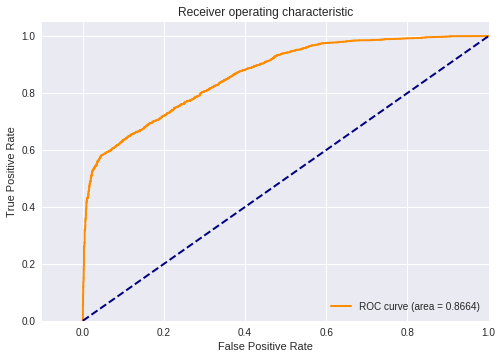

In [102]:
import sys
from sklearn import linear_model
logistic_model = fit_predict_and_calculate_metrics(linear_model.LogisticRegression(C=sys.maxsize), 
                                                   X_train, Y_train, X_test, Y_test)

#### SVM with hard margin

pipe type = <class 'sklearn.svm.classes.SVC'>
accuracy:0.7714186005932647
precision:0.9024676850763808
recall:0.573134328358209
f1:0.7010497489730716
confusion_matrix:
[[2885  166]
 [1144 1536]]


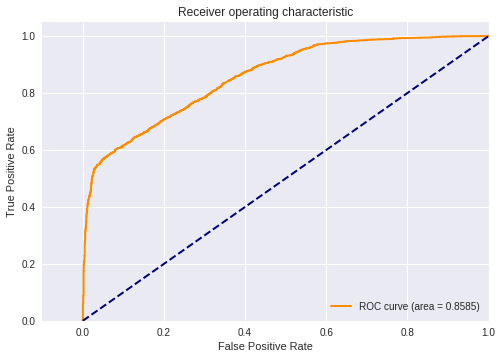

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
from sklearn import svm

pipeline_svm_hard_margin = svm.SVC(kernel="linear", probability=True,C=1000)

fit_predict_and_calculate_metrics(pipeline_svm_hard_margin, X_train, Y_train, X_test, Y_test)

#### SVM with soft margin

pipe type = <class 'sklearn.svm.classes.SVC'>
accuracy:0.7197696737044146
precision:0.9595709570957096
recall:0.4275735294117647
f1:0.5915564598168871
confusion_matrix:
[[2962   49]
 [1557 1163]]


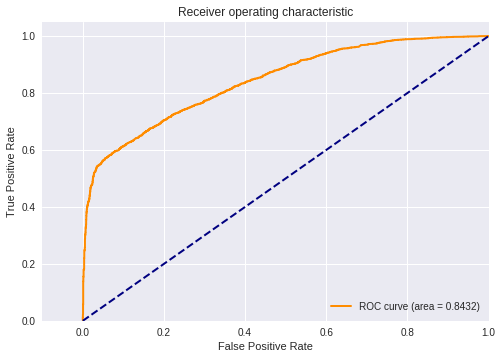

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
from sklearn import svm

pipeline_svm_soft_margin = svm.SVC(kernel="linear", probability=True,C=.01)

fit_predict_and_calculate_metrics(pipeline_svm_soft_margin, X_train, Y_train, X_test, Y_test)

#### Naive Bayes

pipe type = <class 'sklearn.pipeline.Pipeline'>
accuracy:0.7178502879078695
precision:0.7417007730786721
recall:0.6085820895522388
f1:0.6685796269727403
confusion_matrix:
[[2483  568]
 [1049 1631]]


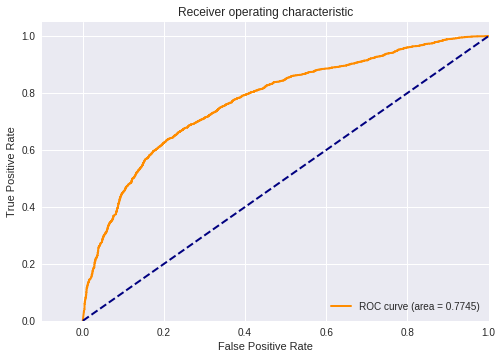

Pipeline(memory=None,
     steps=[('toarr', SparseToDenseArray()), ('clf', GaussianNB(priors=None))])

In [105]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import NMF

class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self


pipeline_gaussian = Pipeline([
    ('toarr', SparseToDenseArray()),
    ('clf', GaussianNB()),
])

fit_predict_and_calculate_metrics(pipeline_gaussian, X_train, Y_train, X_test, Y_test)

# Define Your Own

###QUESTION 16
The dataset in hands is rich as there is a lot of metadata to each tweet. Be creative and propose a new problem (something interesting that can be inferred from this dataset) other than the previous parts. You can look into the literature of Twitter data analysis to get some ideas. Implement your idea and show that it works. As a suggestion, you might provide some analysis based on changes of tweet sentiments for fans of the opponent teams participating in the match. You get full credit for briniging in novelty and full or partial implementation of your new ideas.

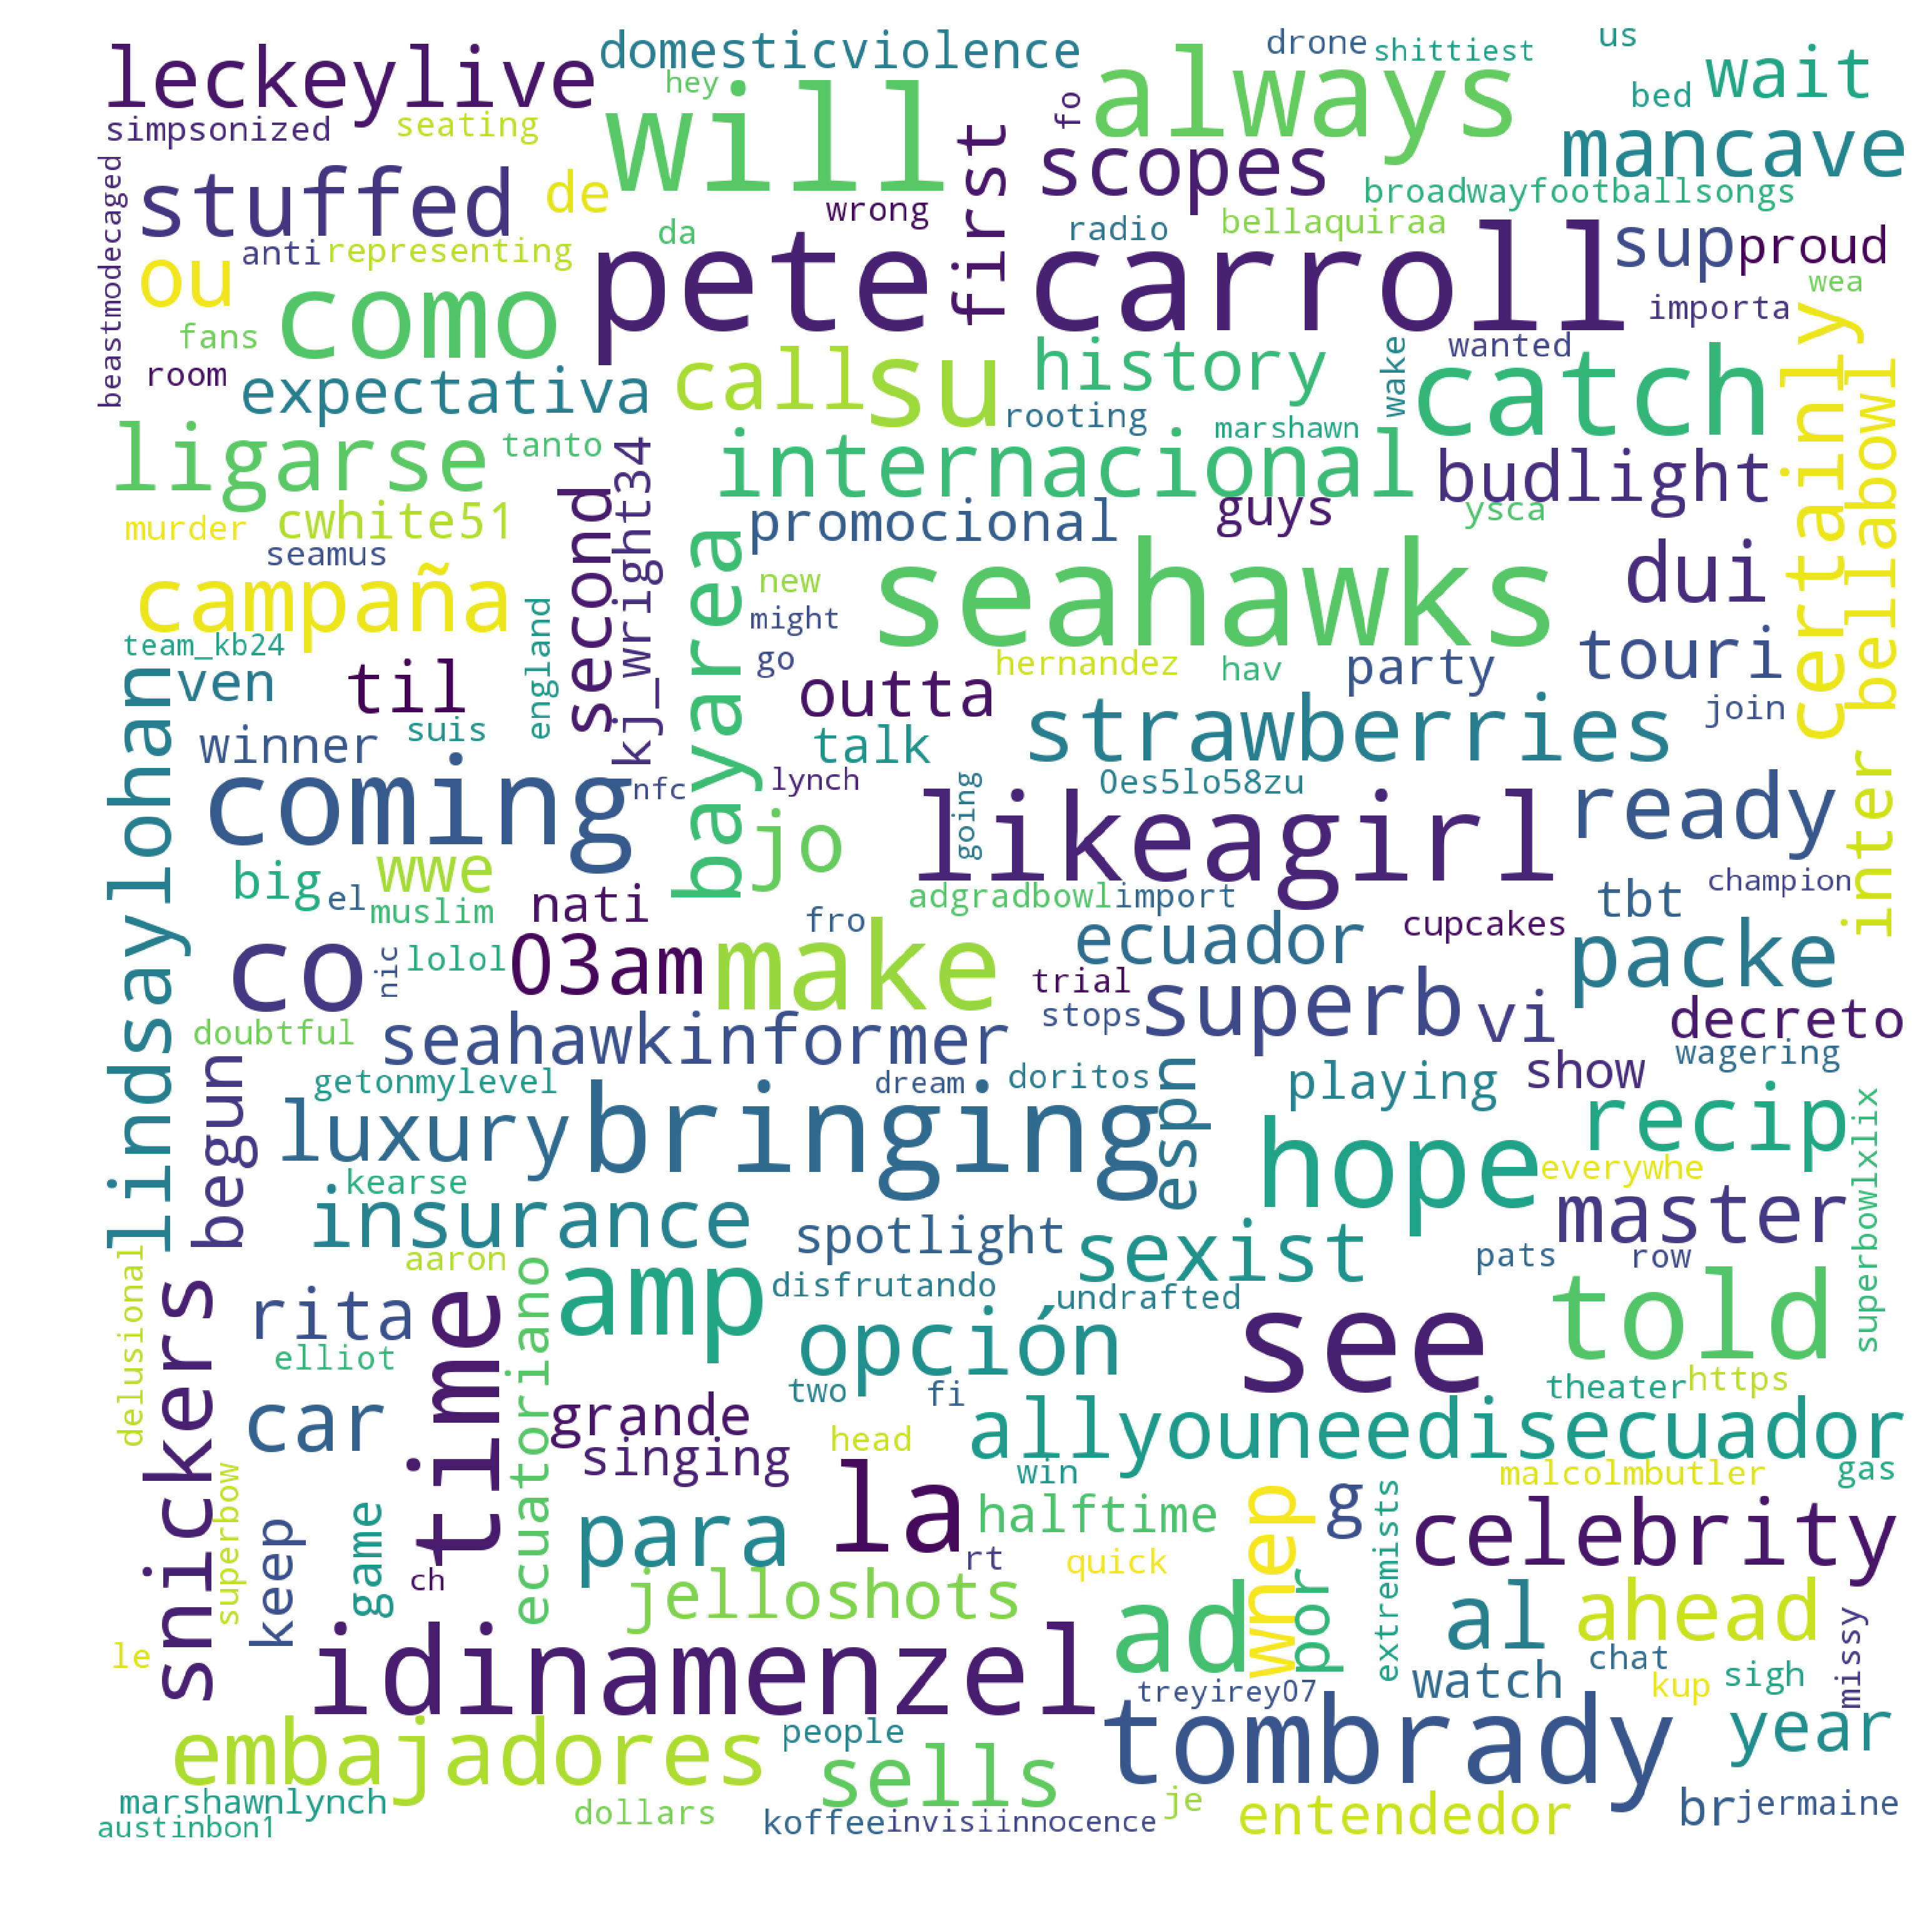

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
SUPERBOWL_START_TIME = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
SUPERBOWL_END_TIME = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pytz.timezone('America/Los_Angeles'))

d = ALL_DATA['#superbowl']
bowl_data = d[(d.pst_timestamp < SUPERBOWL_END_TIME) & (d.pst_timestamp > SUPERBOWL_START_TIME)]
post_bowl_data = d[d.pst_timestamp > SUPERBOWL_END_TIME]

stopwords = set(STOPWORDS)
for key in ALL_DATA.keys(): 
    stopwords.add(key)
    stopwords.add(key[1:])
stopwords.add('congrats')
stopwords.add('congratulations')
stopwords.add('Sunday')
wordcloud = WordCloud(width=1500, height=1500,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(bowl_data['text']).lower())
plt.figure(figsize=(10,10),facecolor='white',dpi=300)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [0]:
layout = wordcloud.__dict__['layout_']

words = [x[0][0] for x in layout]

In [218]:
print('Insurance,',words.index('Insurance'))
print('LindsayLohan,',words.index('LindsayLohan'))


print('snickers,',words.index('snickers'))
print('budlight,',words.index('budlight'))


print('AllYouNeedIsEcuador,',words.index('AllYouNeedIsEcuador'))
print('Ecuador,',words.index('Ecuador'))

print('LikeAGirl,',words.index('LikeAGirl'))

print('idinamenzel,',words.index('idinamenzel'))

print('Doritos,',words.index('Doritos'))

print('Halftime,',words.index('Halftime'))

print(words)

Insurance, 55
LindsayLohan, 52
snickers, 31
budlight, 68
AllYouNeedIsEcuador, 37
Ecuador, 64
LikeAGirl, 9
idinamenzel, 12
Doritos, 137
Halftime, 89
['will', 'Seahawks', 'see', 'Pete Carroll', 'la', 'ad', 'amp', 'Always', 'bringing', 'LikeAGirl', 'Make', 'Como', 'idinamenzel', 'Hope', 'Catch', 'Su', 'coming', 'co', 'TomBrady', 'time', 'told', 'ready', 'BayArea', 'celebrity', 'packe', 'Embajadores', 'opción', 'para', 'ligarse', 'al', 'SuperB', 'snickers', 'stuffed', 'strawberries', 'recip', 'campaña', 'internacional', 'AllYouNeedIsEcuador', 'luxury', 'mancave', 'certainly', 'Call', 'Sexist', 'Jo', 'Ahead', '03AM', 'WNEP', 'LeckeyLive', 'scopes', 'ou', 'DUI', 'Master', 'LindsayLohan', 'Sells', 'Car', 'Insurance', 'SeahawkInformer', 'wait', 'til', 'Sup', 'second', 'year', 'G', 'vi', 'Ecuador', 'History', 'First', 'Touri', 'budlight', 'Rita', 'JelloShots', 'outta', 'BellaBowl', 'begun', 'WWE', 'espn', 'INTER', 'Expectativa', 'por', 'promocional', 'ecuatoriano', 'grande', 'entendedor', 'de',

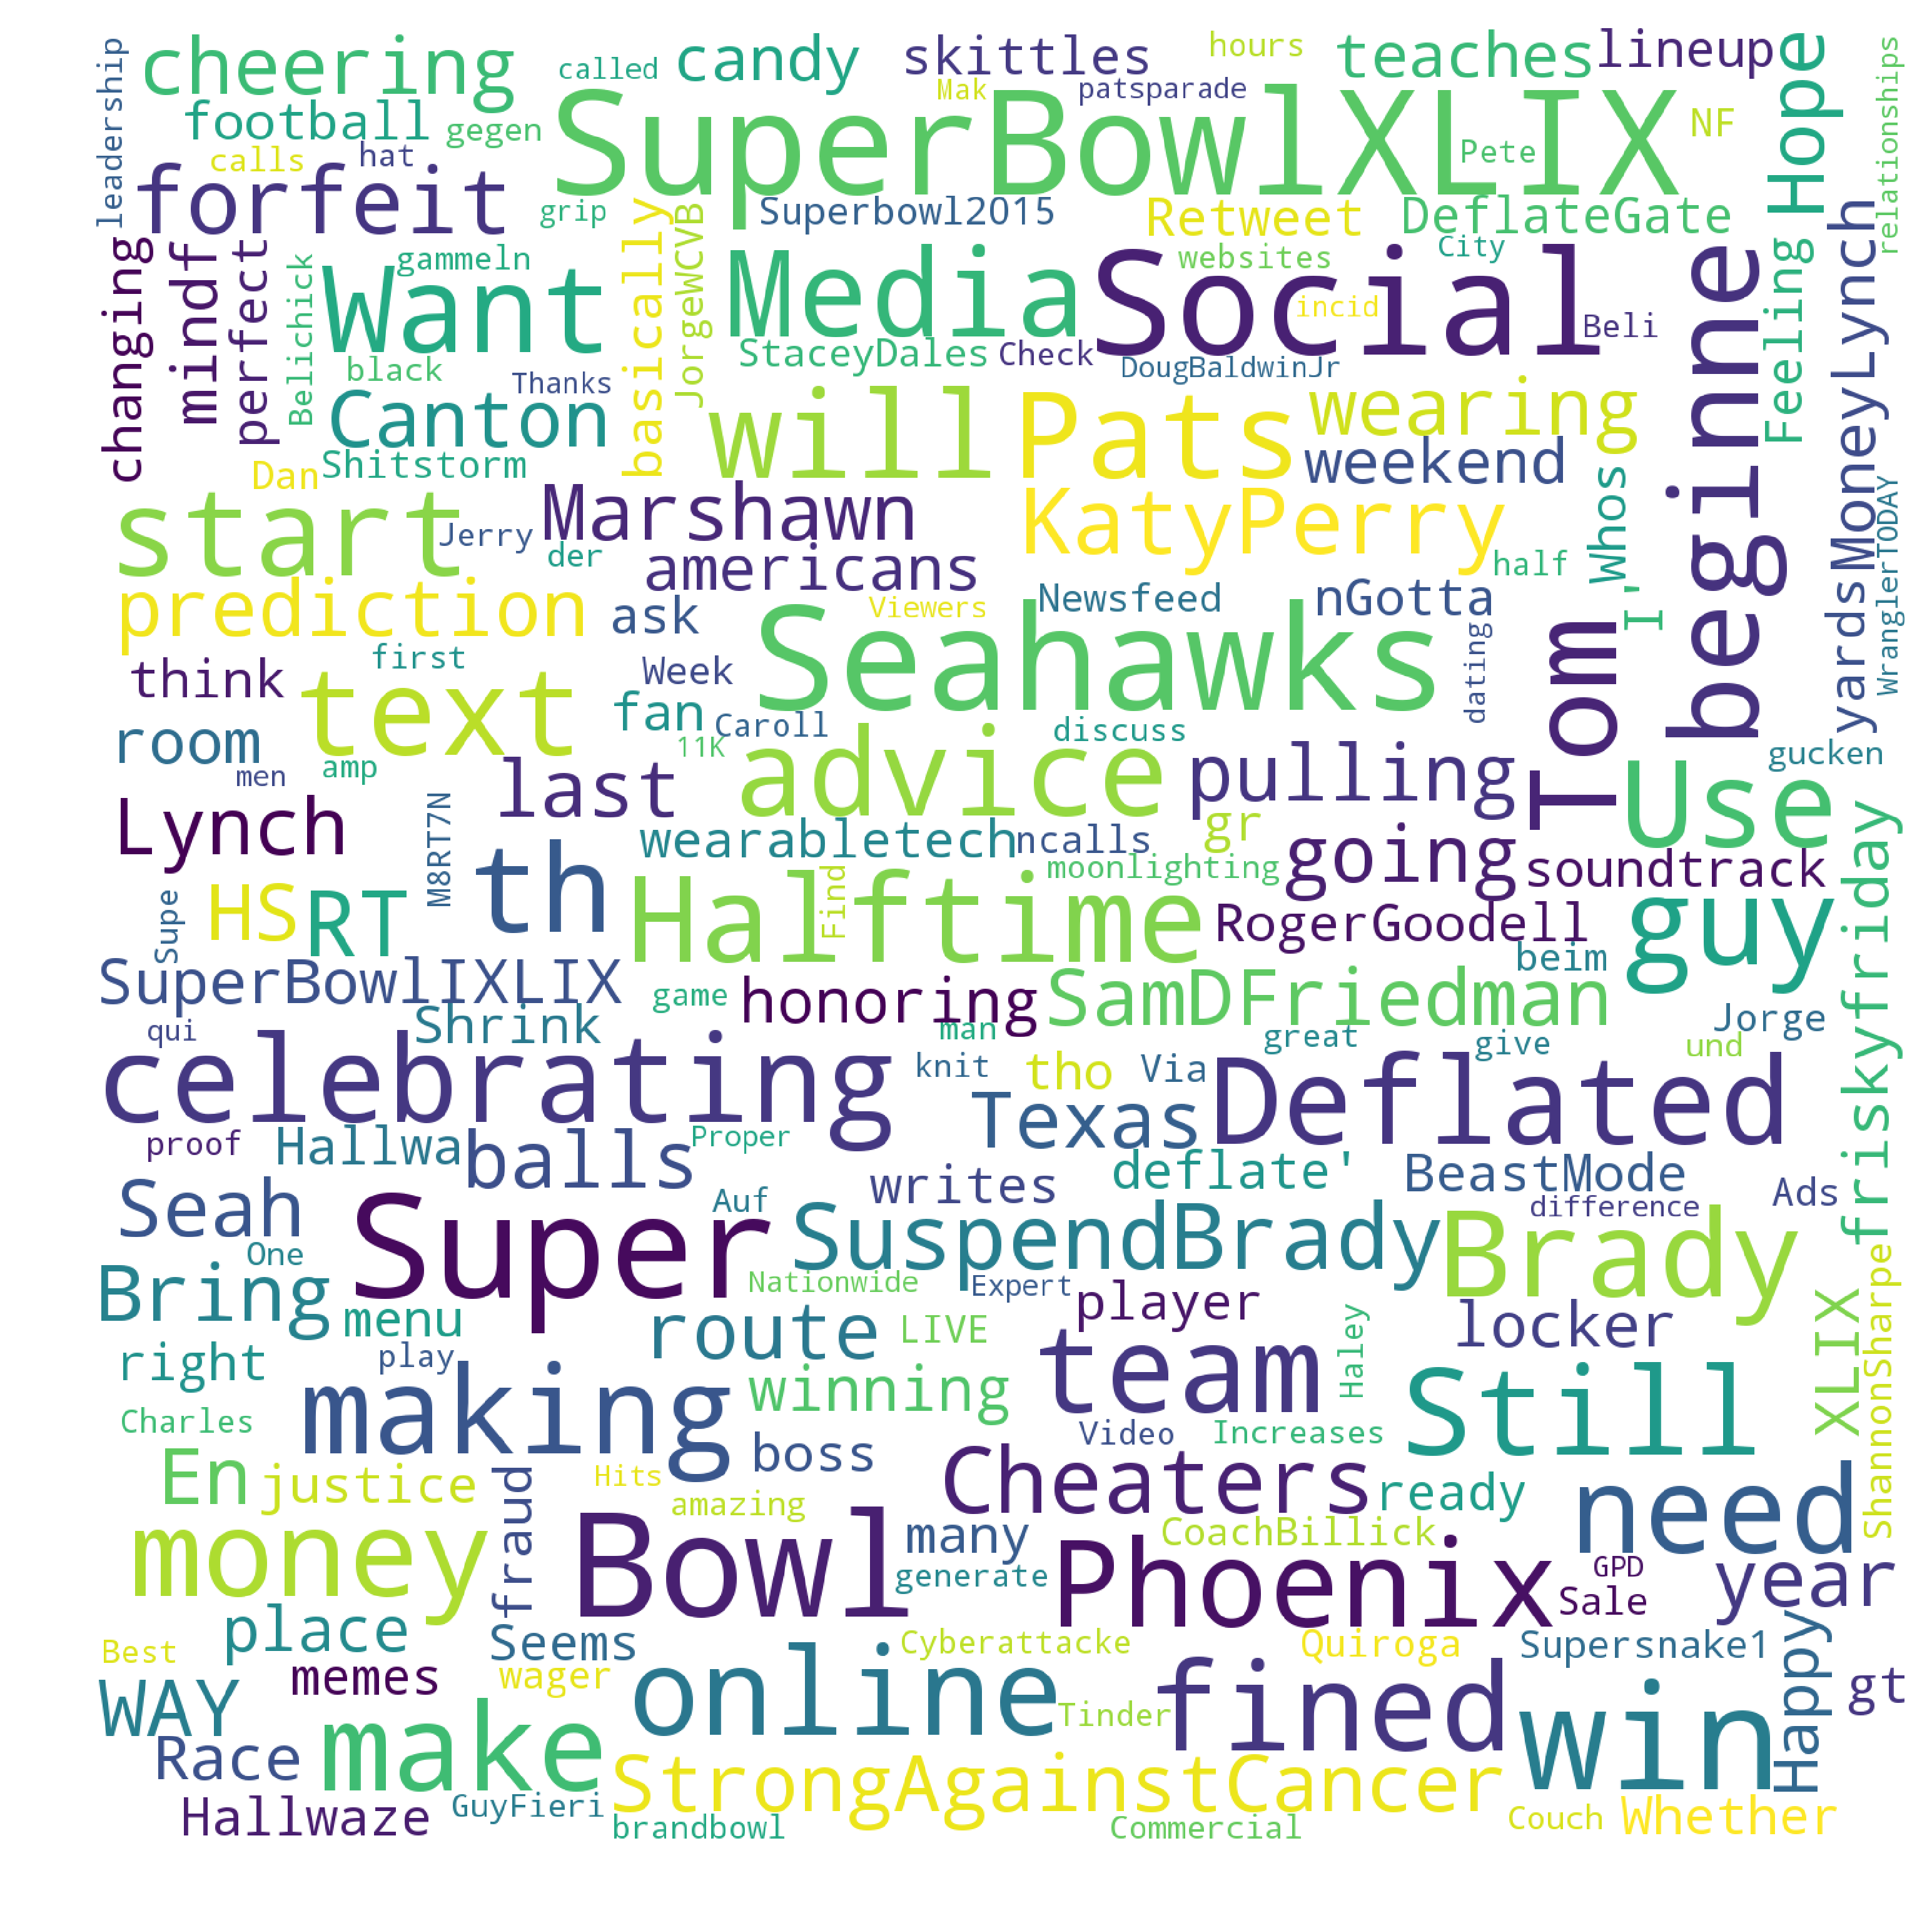

In [31]:
wordcloudAll = WordCloud(width=1500, height=1500,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(post_bowl_data['text']))
plt.figure(figsize=(10,10),facecolor='white',dpi=300)
plt.imshow(wordcloudAll)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [0]:
import requests
import string


def getResponse(text):
    text=''.join([x for x in text if ord(x) < 128])
    input = 'text={}'.format(urlify(text,len(text)))
    headers = {
    'X-Mashape-Key': 'HOUHdNSnJFmshEeZy2nPbIe1bjVjp1A3Kobjsny07SslrRAX35',
    'Content-Type': 'application/x-www-form-urlencoded',
    'Accept': 'application/json',
    }
    data = [('text', text),]
    out =  requests.post('https://japerk-text-processing.p.mashape.com/sentiment/', headers=headers, data=data)
    result = json.loads(out._content)['label']
    return result;


In [13]:
SUPERBOWL_START_TIME = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
SUPERBOWL_END_TIME = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
from wordcloud import WordCloud, STOPWORDS
import os
allFiles = os.listdir(TRAINPATH) # returns list
print(allFiles)
topics = {
     'doritos': 'Doritos',
     'snickers':'snicker',
     'budlight':'budlight',
     'ecuador': 'Ecuador|AllYouNeedIsEcuador',
     'esurance':'LindsayLohan|esurance|Lindsay Lohan',
     'likeAGirl':'LikeAGirl',
     'halftime':'KatyPerry',
     'idinamenzel':'idinamenzel'
    
}
title = {
    'doritos':   'Doritos',
     'snickers':'Snickers',
     'budlight':'Budlight',
     'ecuador': 'Ecuador Tourism',
     'esurance':'Esurance',
     'likeAGirl':'LikeAGirl',
     'halftime': 'Halftime Show with Katy Perry',
     'idinamenzel':'National Anthem | Idina Menzel '
 
}

d = ALL_DATA['#superbowl']
bowl_data = d[(d.pst_timestamp < SUPERBOWL_END_TIME) & (d.pst_timestamp > SUPERBOWL_START_TIME)]
stopwords = set(STOPWORDS)
print(bowl_data.shape)
for topic, searchTerm in topics.items():
    superbowlText = bowl_data[bowl_data['text'].str.contains(searchTerm,case=False)]
    print(superbowlText.shape)
    response=[]
    i = 0;

    #We will only sample only 3000 tweets for Katy Perry's halftime perfomance
    #There were more than 58000 tweets about KatyPerry on the day of Superbowl
    #We can estimate general reaction to the perfomance based random sample of 3000

    if(superbowlText.shape[0]>4000):
        superbowlText = superbowlText.sample(n=3000)
    if('sentiment{}.p'.format(topic) not in allFiles):
        for text in superbowlText['text']:
            if i%100==0:
                print(topic,i,"steps done")
            i+=1
            response.append(getResponse(text))
        pickle.dump(response, open( "{}sentiment{}.p".format(TRAINPATH,topic), "wb" ))
    else:
        print(topic,"is already analyzed")

['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt', 'superbowl.p', 'nfl.p', 'gohawks.p', 'sb49.p', 'gopatriots.p', 'patriots.p', 'aggregated.p', 'gs_forest_q7.p', 'gs_gradient_q9.p', 'gs_gradient_before.p', 'gs_gradient_during.p', 'gs_gradient_after.p', 'gs_neural_net_q13.p', '#superbowl.csv', '#superbowl_data.csv.', 'gs_gradient_aggregated.p', 'sentimentdoritos.p', 'sentimentbudlight.p', 'sentimentsnickers.p', 'sentimentecuador.p', 'sentimentesurance.p', 'sentimentlikeAGirl.p', 'sentimenthalftime.p', 'sentimentidinamenzel.p', 'sentimentdoritos_1.p', 'sentimentsnickers_1.p', 'sentimentbudlight_1.p', 'sentimentecuador_1.p', 'sentimentesurance_1.p', 'sentimentlikeAGirl_1.p', 'sentimenthalftime_1.p', 'sentimentidinamenzel_1.p', 'rf_aggregated.p', 'gs_neural_net_aggregated.p']
(924306, 8)
(2604, 8)
doritos is already analyzed
(2151, 8)
snickers is already analyzed
(1087, 8)
budlight is already analyzed
(2

2604
[1070, 802, 732]


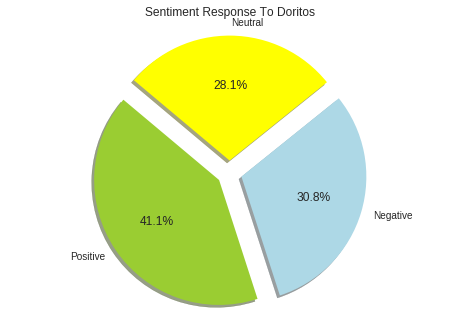

2151
[1111, 626, 414]


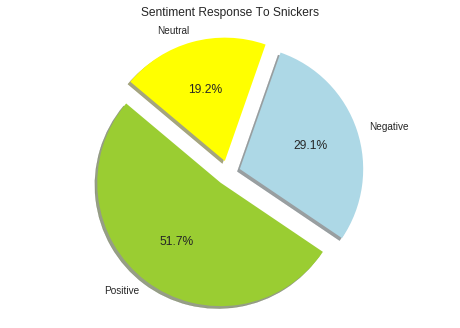

1087
[361, 432, 294]


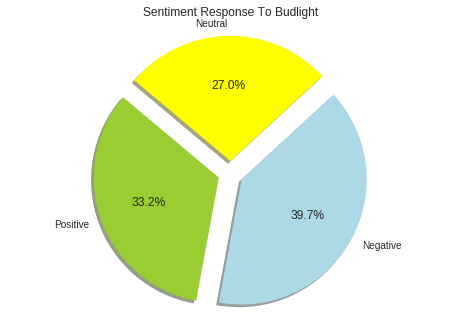

2092
[1146, 263, 683]


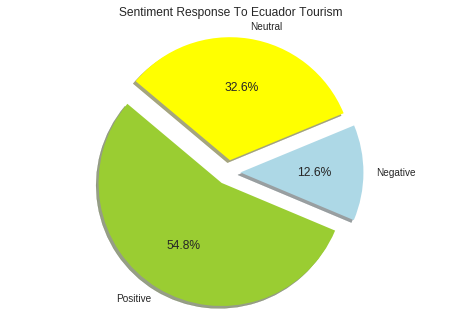

2003
[661, 517, 825]


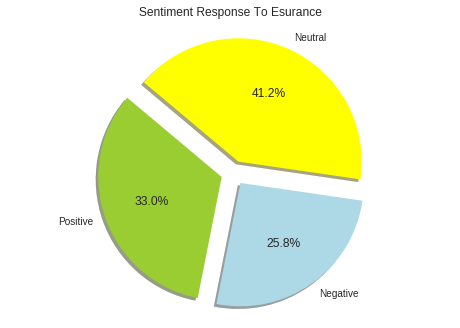

3247
[1624, 749, 874]


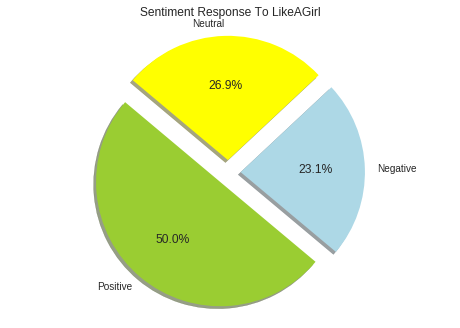

3000
[1387, 683, 930]


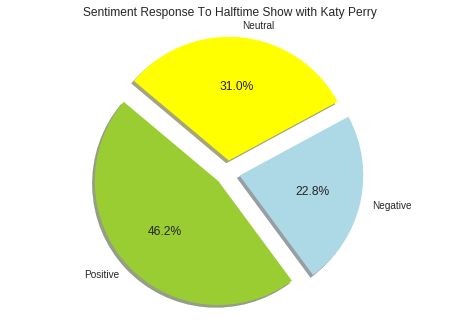

3103
[1452, 597, 1054]


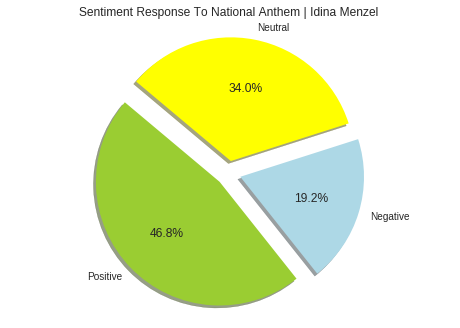

In [10]:
from collections import Counter
for topic in topics:
    sentiment = pickle.load(open("{}sentiment{}.p".format(TRAINPATH,topic), "rb" ))
    cntr = Counter(sentiment)
    display_labels = ['Positive','Negative','Neutral']
    labels = ['pos','neg','neutral']
    counts = [0,0,0]
    
    for idx, label in enumerate(labels):
        counts[idx] = cntr[label]
    print(sum(counts))
    colors = ['yellowgreen', 'lightblue', 'yellow']
    explode = (0.1, 0.1, 0.1)
    plt.pie(counts, explode=explode, labels=display_labels, colors=colors,
         autopct='%1.1f%%', shadow=True, startangle=140)
    print(counts)
    plt.title('Sentiment Response To {}'.format(title[topic]))
    
    plt.axis('equal')
    plt.show()

##Following is an attempt to analyze this data usinf NLTK Vader Sentiment Intensity Analyzer


[nltk_data] Downloading package vader_lexicon to /content/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


['tweets_#gohawks.txt', 'tweets_#gopatriots.txt', 'tweets_#nfl.txt', 'tweets_#patriots.txt', 'tweets_#sb49.txt', 'tweets_#superbowl.txt', 'superbowl.p', 'nfl.p', 'gohawks.p', 'sb49.p', 'gopatriots.p', 'patriots.p', 'aggregated.p', 'gs_forest_q7.p', 'gs_gradient_q9.p', 'gs_gradient_before.p', 'gs_gradient_during.p', 'gs_gradient_after.p', 'gs_neural_net_q13.p', '#superbowl.csv', '#superbowl_data.csv.', 'gs_gradient_aggregated.p', 'sentimentdoritos.p', 'sentimentbudlight.p', 'sentimentsnickers.p', 'sentimentecuador.p', 'sentimentesurance.p', 'sentimentlikeAGirl.p', 'sentimenthalftime.p', 'sentimentidinamenzel.p', 'sentimentdoritos_1.p', 'sentimentsnickers_1.p', 'sentimentbudlight_1.p', 'sentimentecuador_1.p', 'sentimentesurance_1.p', 'sentimentlikeAGirl_1.p', 'sentimenthalftime_1.p', 'sentimentidinamenzel_1.p', 'rf_aggregated.p', 'gs_neural_net_aggregated.p']
(2604, 8)
doritos is already analyzed
(2151, 8)
snickers is already analyzed
(1087, 8)
budlight is already analyzed
(2092, 8)
ecua

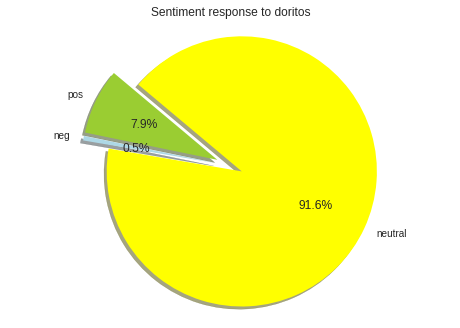

[214, 5, 1932]


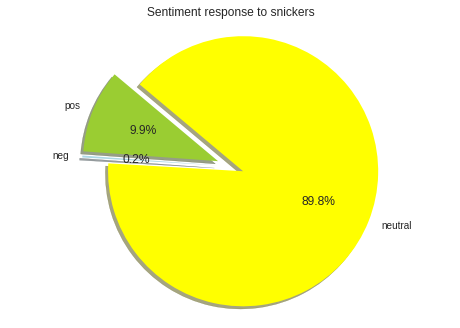

[61, 5, 1021]


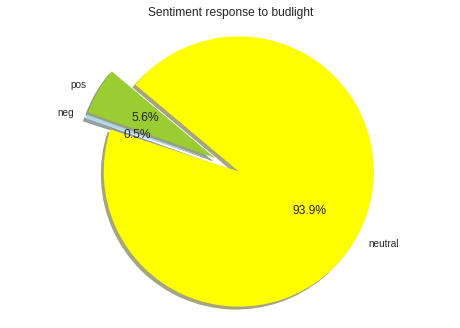

[15, 1, 2076]


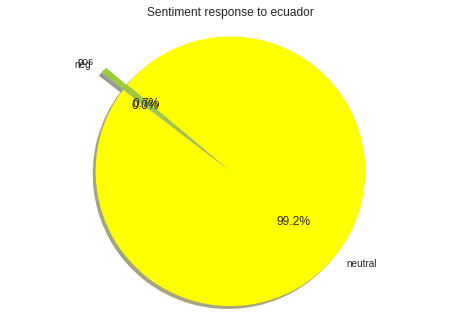

[124, 19, 1860]


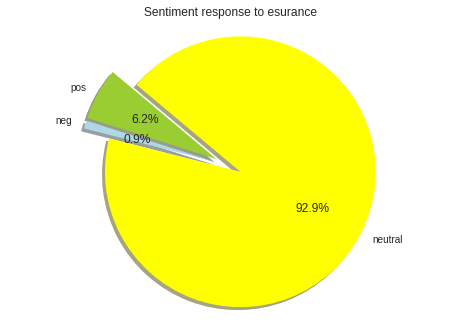

[246, 16, 2985]


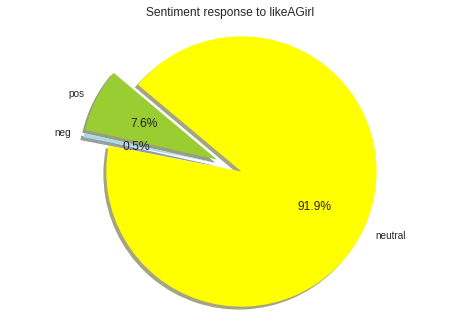

[147, 18, 2835]


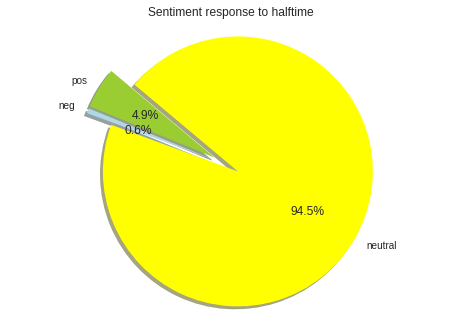

[270, 47, 2786]


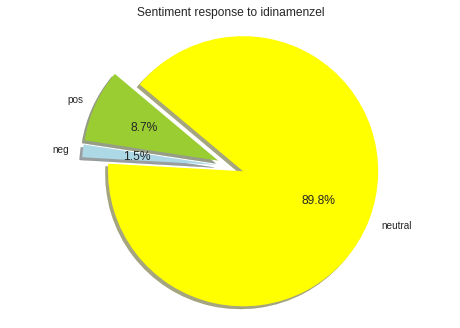

In [11]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

def getVaderSentiment(text):
    text=''.join([x for x in text if ord(x) < 128])
    polarScore = vader_analyzer.polarity_scores(text)
    
    scores = {'pos':polarScore['pos'],
              'neg':polarScore['neg'],
              'neutral':polarScore['neu']}
    
    return max(scores, key=scores.get)

SUPERBOWL_START_TIME = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
SUPERBOWL_END_TIME = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pytz.timezone('America/Los_Angeles'))
from wordcloud import WordCloud, STOPWORDS
import os
allFiles = os.listdir(TRAINPATH) # returns list
print(allFiles)
topics = {
     'doritos': 'Doritos',
     'snickers':'snicker',
     'budlight':'budlight',
     'ecuador': 'Ecuador|AllYouNeedIsEcuador',
     'esurance':'LindsayLohan|esurance|Lindsay Lohan',
     'likeAGirl':'LikeAGirl',
     'halftime':'KatyPerry',
     'idinamenzel':'idinamenzel'
    
}
d = ALL_DATA['#superbowl']
bowl_data = d[(d.pst_timestamp < SUPERBOWL_END_TIME) & (d.pst_timestamp > SUPERBOWL_START_TIME)]
stopwords = set(STOPWORDS)
for topic, searchTerm in topics.items():
    superbowlText = bowl_data[bowl_data['text'].str.contains(searchTerm,case=False)]
    print(superbowlText.shape)
    response=[]
    i = 0;

    #We will only sample only 3000 tweets for Katy Perry's halftime perfomance
    #There were more than 58000 tweets about KatyPerry on the day of Superbowl
    #We can estimate general reaction to the perfomance based random sample of 3000

    if(superbowlText.shape[0]>4000):
        superbowlText = superbowlText.sample(n=3000)
    if('sentiment{}_1.p'.format(topic) not in allFiles):
        for text in superbowlText['text']:
            if i%100==0:
                print(topic,i,"steps done")
            i+=1
            response.append(getVaderSentiment(text))
        pickle.dump(response, open( "{}sentiment{}_1.p".format(TRAINPATH,topic), "wb" ))
    else:
        print(topic,"is already analyzed")
        
from collections import Counter
for topic in topics:
    sentiment = pickle.load(open("{}sentiment{}_1.p".format(TRAINPATH,topic), "rb" ))
    cntr = Counter(sentiment)
    labels = ['pos','neg','neutral']
    counts = [0,0,0]
    
    for idx, label in enumerate(labels):
        counts[idx] = cntr[label]
    colors = ['yellowgreen', 'lightblue', 'yellow']
    explode = (0.1, 0.1, 0.1)
    plt.pie(counts, explode=explode, labels=labels, colors=colors,
         autopct='%1.1f%%', shadow=True, startangle=140)
    print(counts)
    plt.title('Sentiment response to {}'.format(topic))
    
    plt.axis('equal')
    plt.show()